# <font color = 'blue'>Predicting Bike Rental Demand Using Multiple Linear Regression</font>

                                                                                                        CREATED BY - SANCHITA PATIL

<a id="problem-statement"></a>
# Problem Statement:
BoomBikes, a US-based bike-sharing provider, has experienced significant revenue drops due to the ongoing COVID-19 pandemic. As the company prepares for a post-pandemic recovery, it aims to understand the factors that influence the demand for shared bikes. This understanding will help BoomBikes strategize and meet customer demands effectively, ensuring a competitive edge in the market.

<a id="objective"></a>
# Objective:
Essentially, the company wants —

- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands i.e. to know the accuracy of the model

- Develop a multiple linear regression model to predict daily bike rentals based on the identified factors.

The target variable for this model is the total count of bike rentals (cnt), which is a sum of casual and registered user rentals.

In [5]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats
from scipy.stats import zscore

## Step 1: Reading and Understanding the Data

In [8]:
bike_rental = pd.read_csv("day.csv")

In [9]:
# Check the head of the dataset
bike_rental.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [10]:
bike_rental.shape

(730, 16)

In [11]:
#Bike Rental info shows no non-null values in the entire dataset. So no need to imput any values.
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
bike_rental.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [13]:
# Unique Values in Each Column: Sorted Overview
bike_rental.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

## Step 2: Visualising the Data

<Figure size 1000x4000 with 0 Axes>

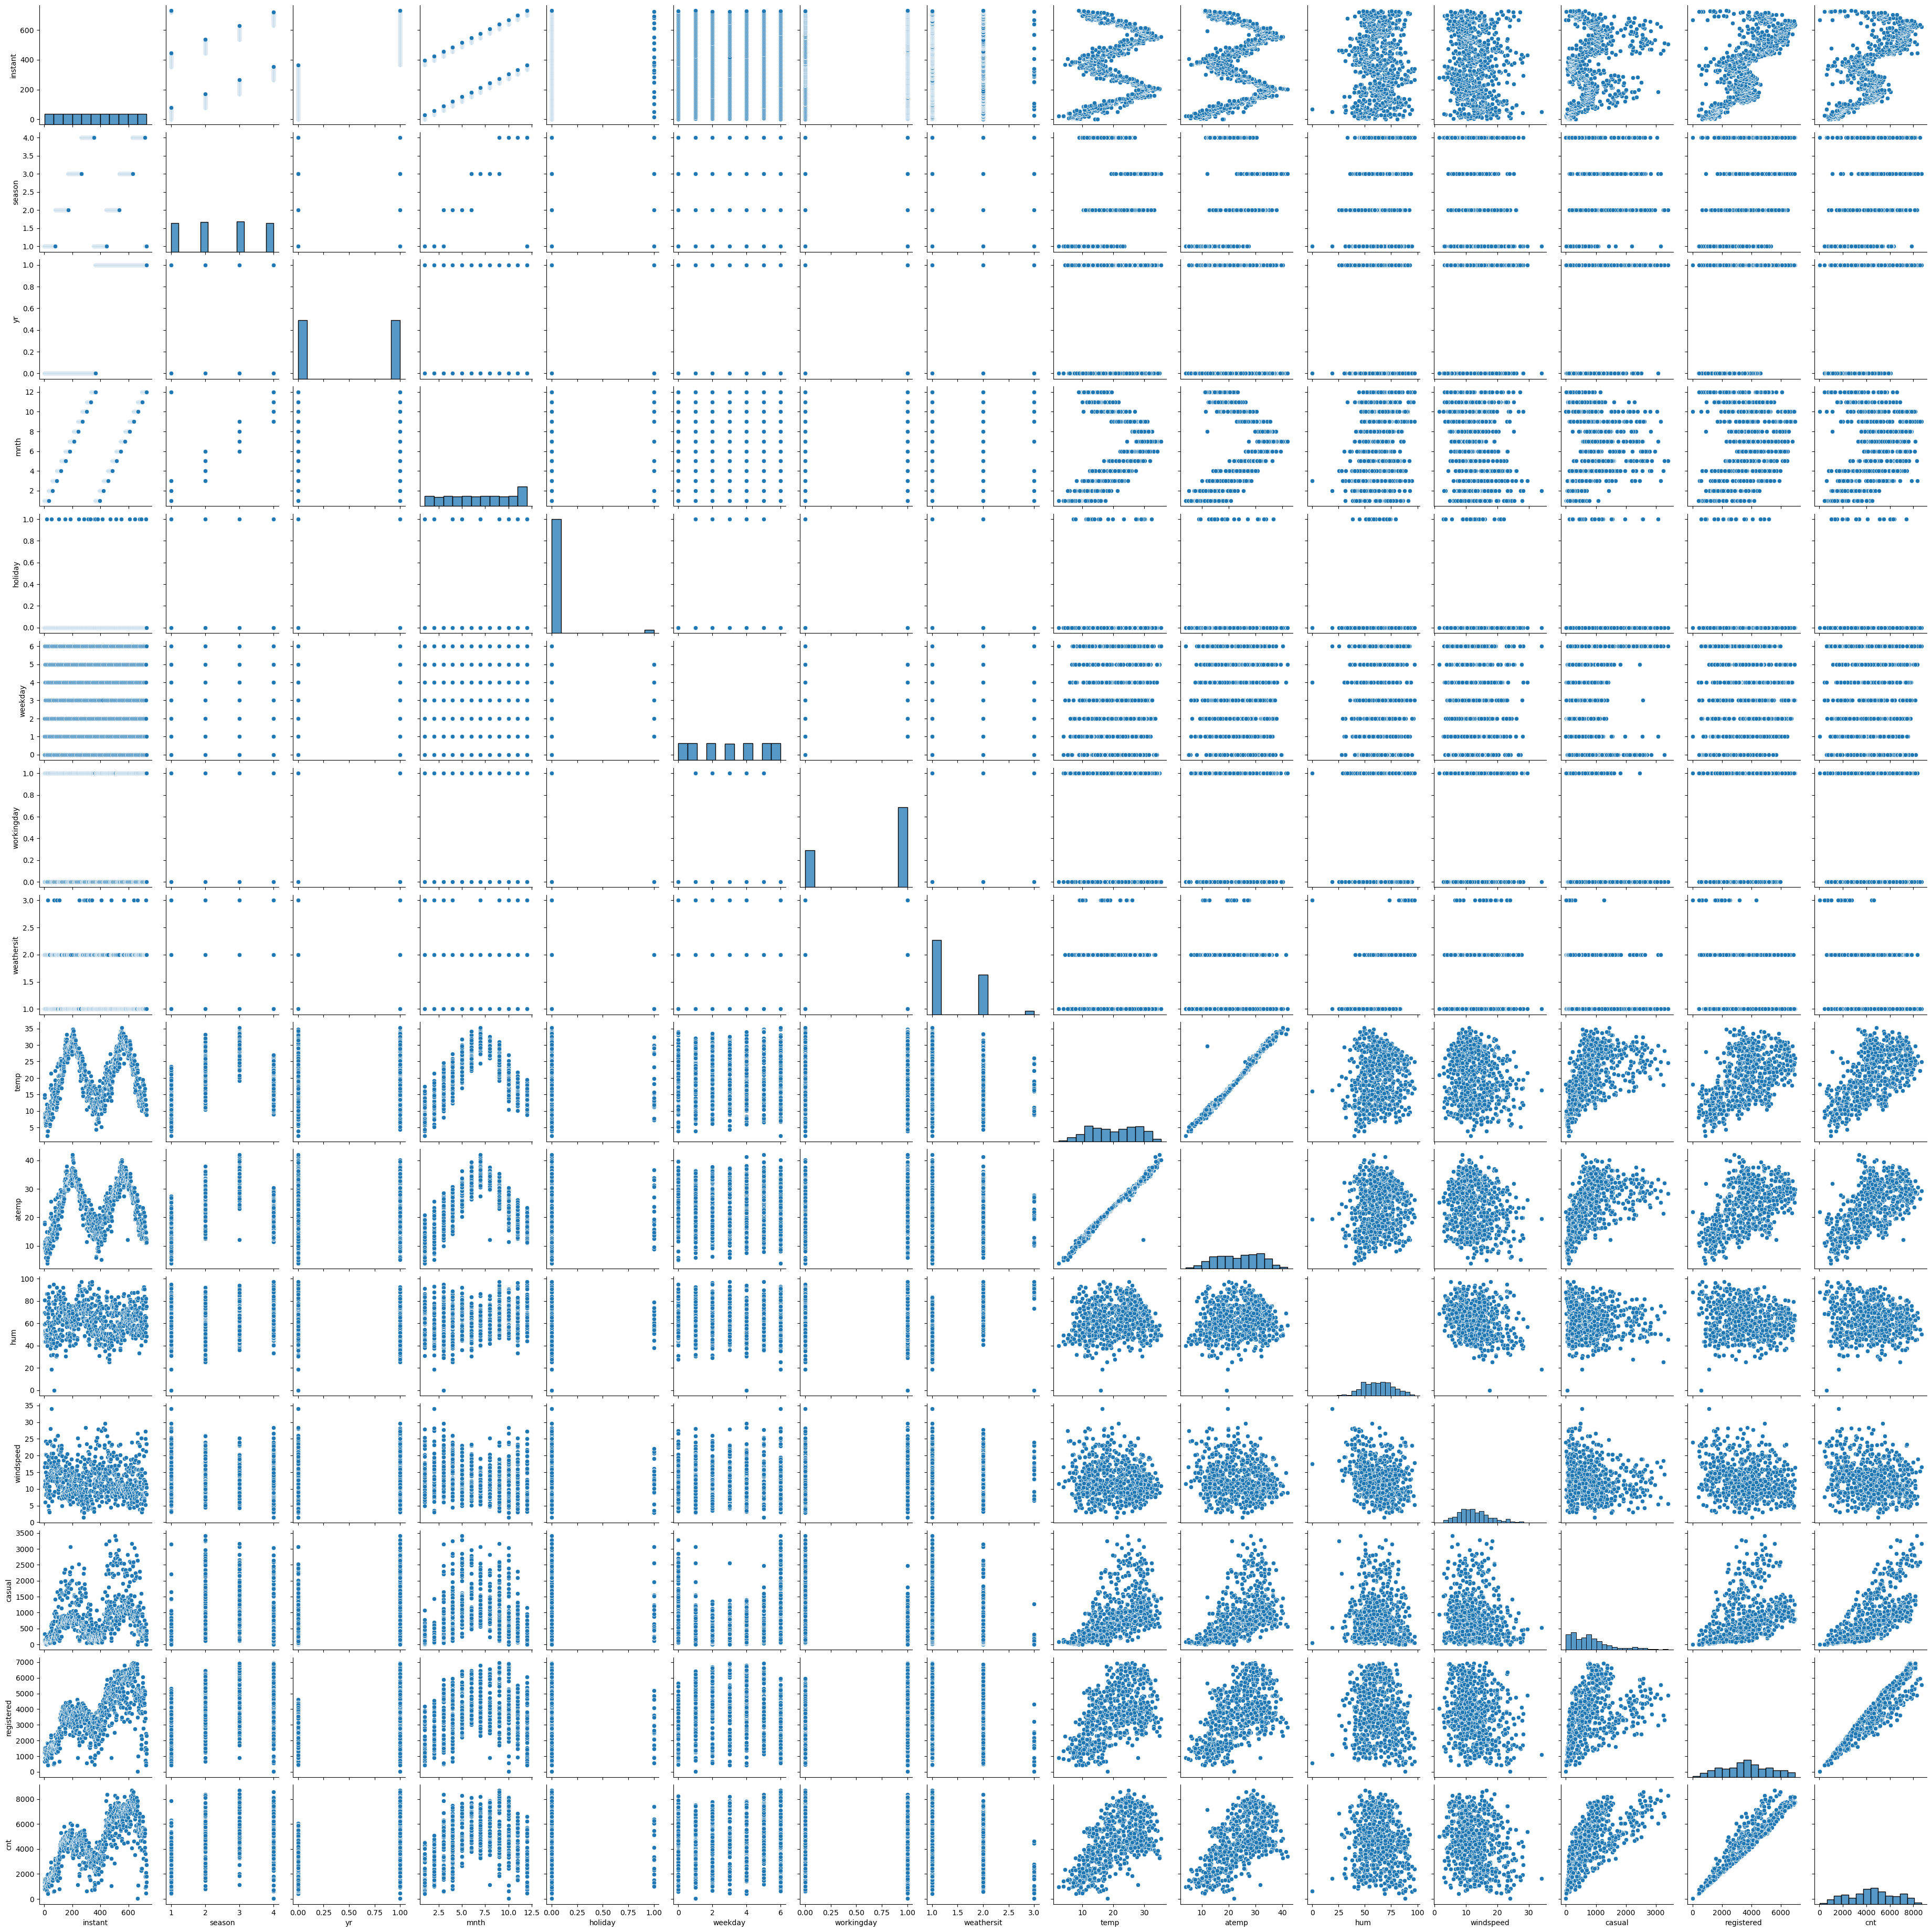

In [15]:
#Let's make a pairplot of all the variables
plt.figure(figsize=(10, 40))
sns.pairplot(bike_rental)

In [16]:
# Selecting the relevant columns including the target variable 'cnt'
cols_of_interest = ['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']

# Calculate the correlation matrix
correlation_matrix = bike_rental[cols_of_interest].corr()

# Extract the correlation with 'cnt'
corr_with_cnt = correlation_matrix['cnt'].sort_values(ascending=False)

# Print the correlations
print(corr_with_cnt)

cnt           1.000000
registered    0.945411
casual        0.672123
atemp         0.630685
temp          0.627044
yr            0.569728
season        0.404584
mnth          0.278191
weekday       0.067534
workingday    0.062542
holiday      -0.068764
hum          -0.098543
windspeed    -0.235132
weathersit   -0.295929
Name: cnt, dtype: float64


#### Visualising Numeric Variables

In [18]:
bike_rental.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [19]:
# Selecting the relevant columns including the target variable 'cnt'
cols_of_interest = ['temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']

# Calculate the correlation matrix
correlation_matrix = bike_rental[cols_of_interest].corr()

# Extract the correlation with 'cnt'
corr_with_cnt = correlation_matrix['cnt'].sort_values(ascending=False)

# Print the correlations
print(corr_with_cnt)

cnt           1.000000
registered    0.945411
casual        0.672123
atemp         0.630685
temp          0.627044
hum          -0.098543
windspeed    -0.235132
Name: cnt, dtype: float64


In [20]:
correlation_temp_atemp = bike_rental[['temp', 'atemp']].corr()
print(correlation_temp_atemp)

           temp     atemp
temp   1.000000  0.991696
atemp  0.991696  1.000000


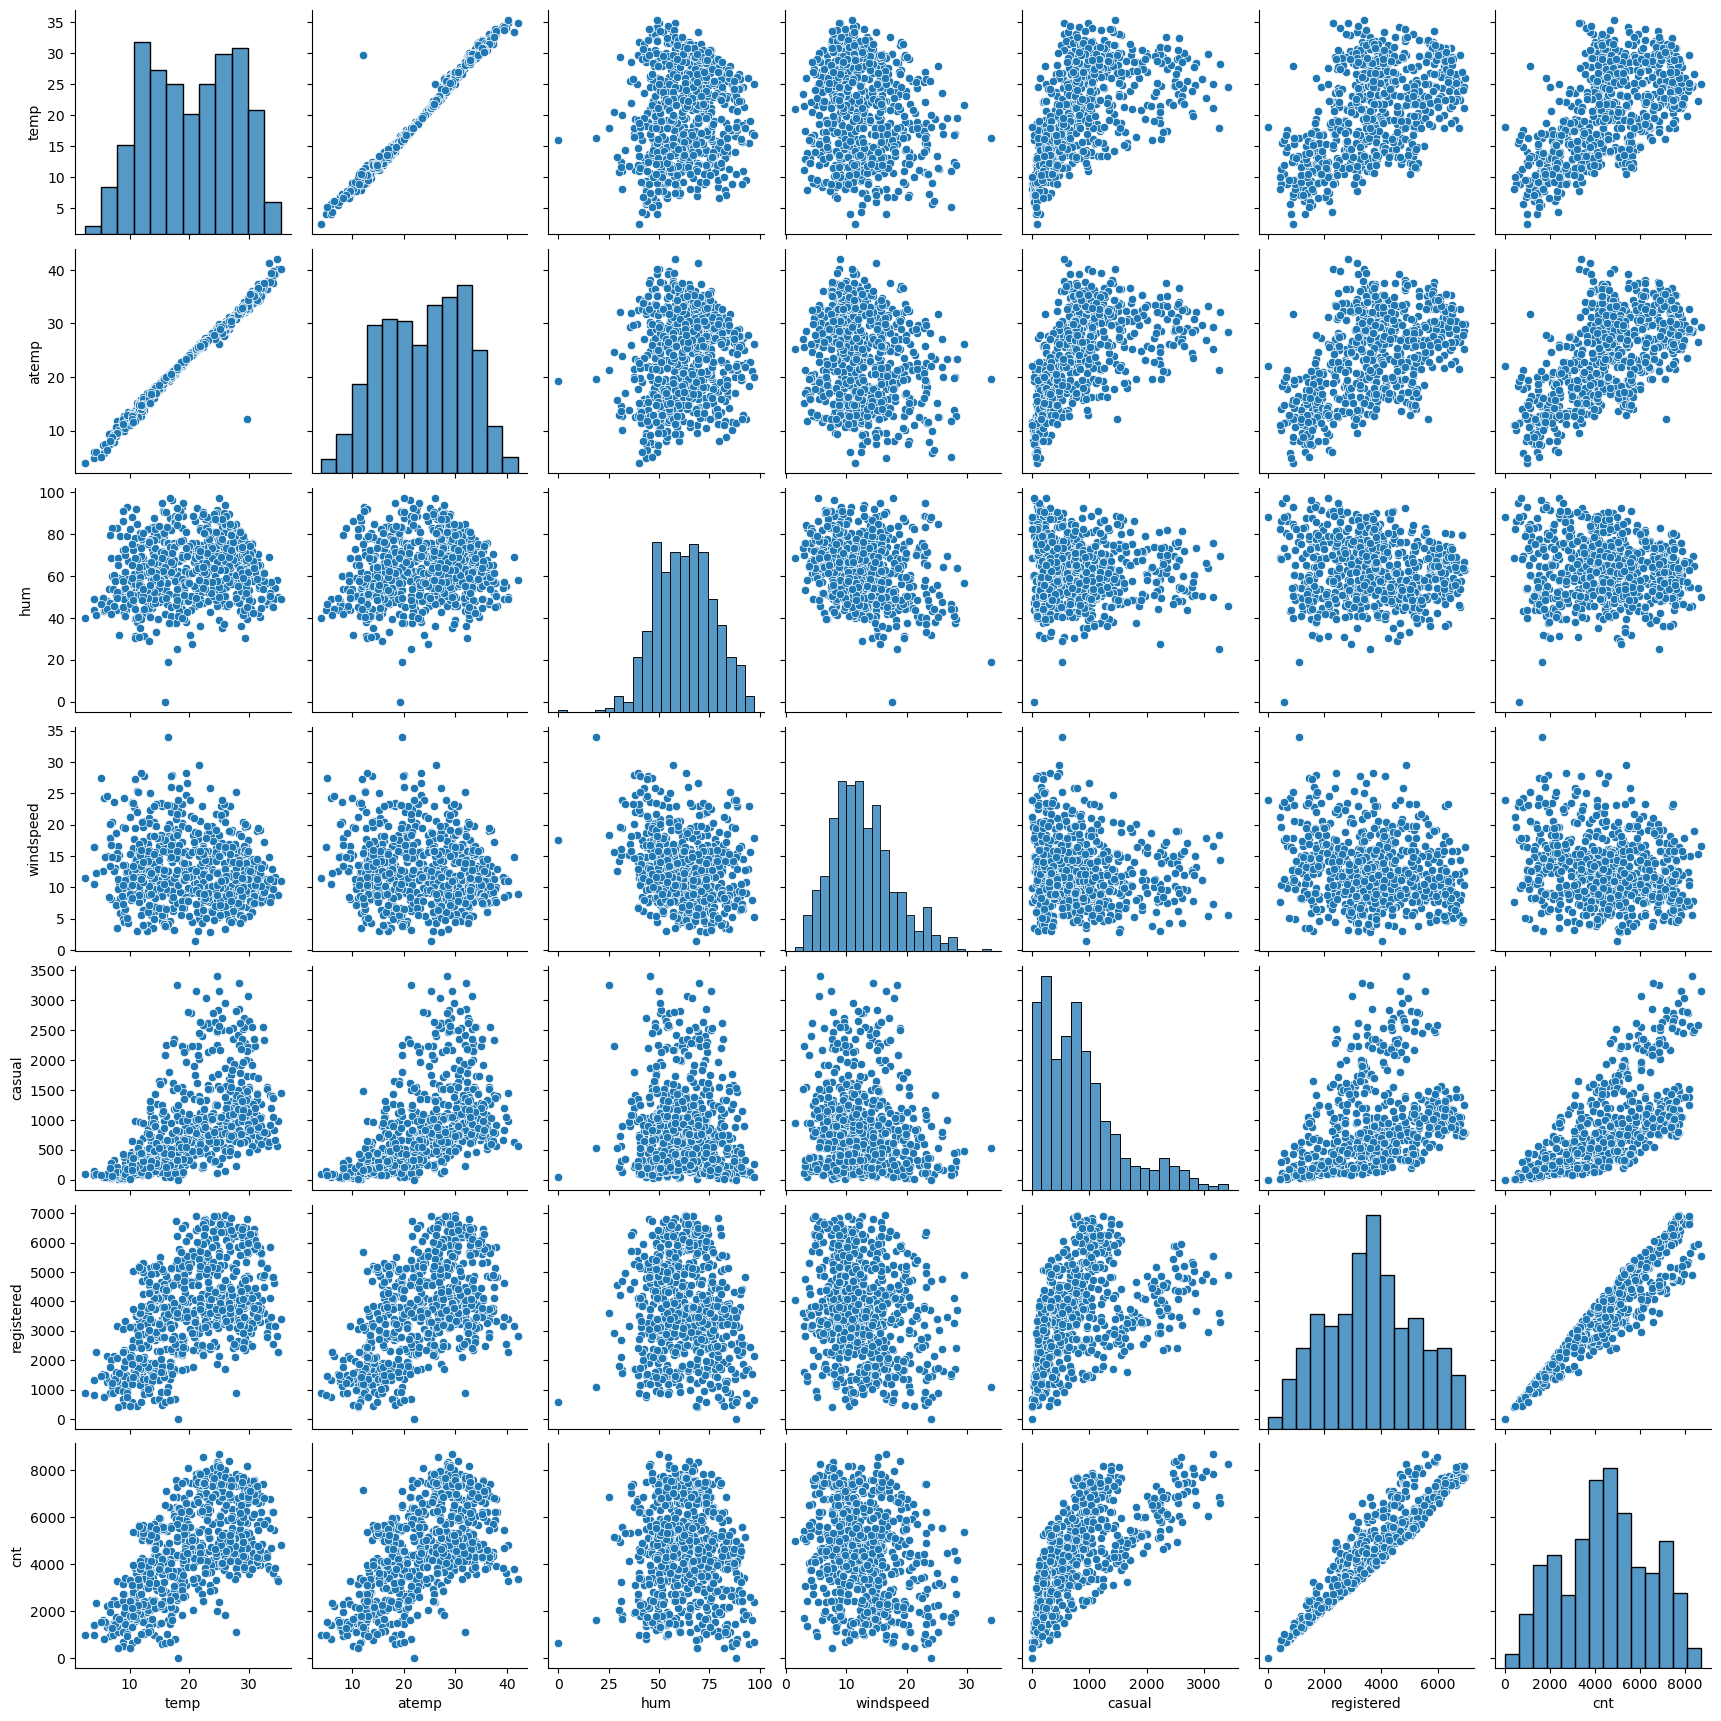

In [21]:
sns.pairplot(data =bike_rental, vars=['temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt'])
plt.show()

<br><font color='red'>**Observations:**</font><font color='blue'> 
1. Looking at the pair-plot and correlation matrix among the numerical variables, registered has the highest correlation with the target variable followed by casual.<br>
2. Looking at the pair-plot and correlation matrix, correlation between temp and atemp is very high (close to 1) ie 0.991, it indicates multicollinearity between these two variables. </font>

#### Visualising Categorical Variables

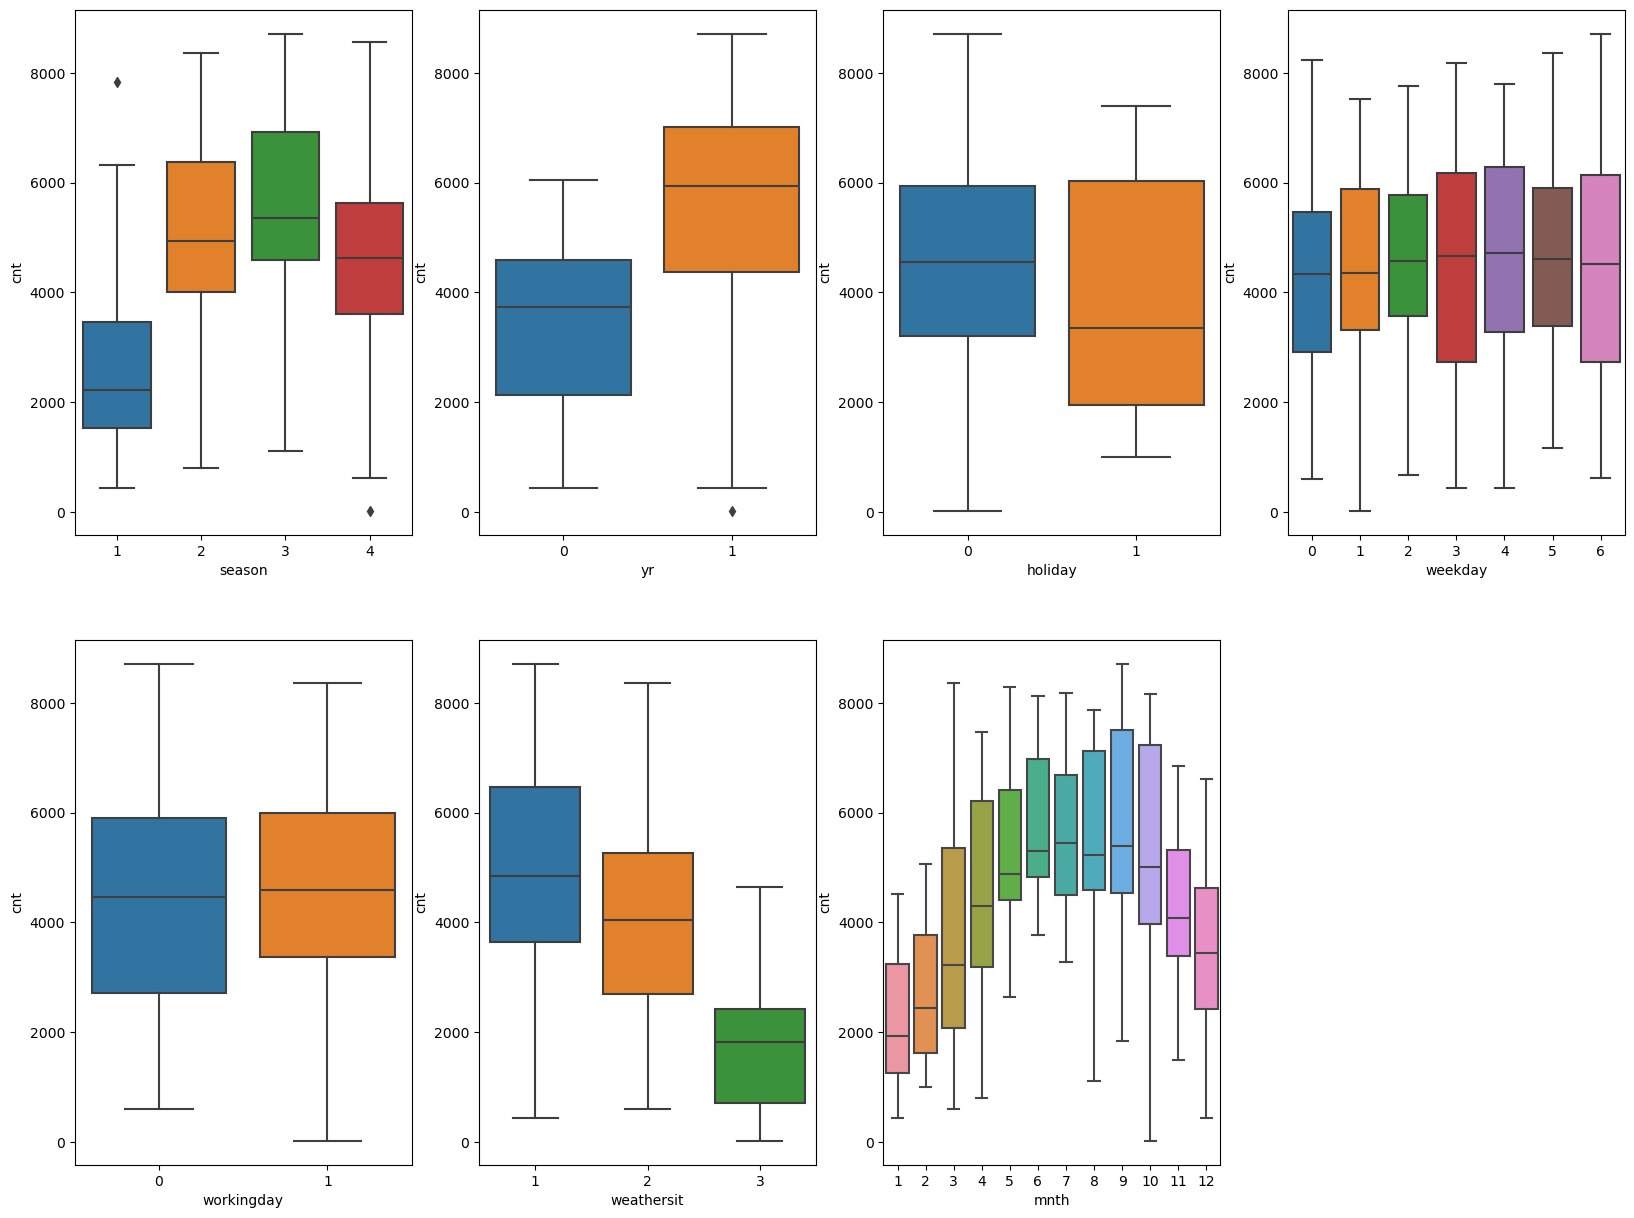

In [24]:
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_rental)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_rental)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_rental)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_rental)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_rental)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_rental)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_rental)
plt.show()

<br><font color='red'>**Observations:**</font><font color='blue'> <br>
1. Peak Season: Fall (3) shows the highest average bike rentals, indicating peak demand. 
   Low Season: Spring (1) has the lowest average bike rentals.
2. The bike-sharing service likely saw increased popularity or improved market conditions in 2019 (indicated as 1), making it a more favorable year for bike rental operations compared to the previous year 2018(indicated as 0).<br>
3. On average, there are slightly fewer bike rentals on holidays compared to non-holiday days (holiday = 1 mean: 3735 bikes vs. holiday = 0 mean: 4530 bikes).<br>
4. Weekend, particularly Saturdays, tend to have higher bike rental demand. Sundays (weekday 6) exhibit higher variability, suggesting less predictable rental patterns, possibly influenced by varying weekend activities or weather conditions. There is a noticeable trend where weekdays closer to the weekend (Thursday to Saturday) generally have higher average bike rental counts compared to weekdays early in the week (Monday to Wednesday).<br>
5. Working days tend to have higher average bike rentals, suggesting that commuting and work-related travel may contribute significantly to bike rental demand during weekdays.<br>
6. The visual reveals that weather conditions significantly influence bike rental demand. Clear or mostly clear days (weathersit = 1) generally see the highest average and maximum bike rentals, likely due to favorable outdoor conditions encouraging bike usage.In contrast, days with mist or cloudy weather (weathersit = 2) show moderate demand, while days with light snow or rain (weathersit = 3) experience lower average and maximum rentals.<br>
7. June (mnth = 6) emerges as the month with the highest average bike rentals, likely due to favorable weather conditions and increased outdoor activities during summer. In contrast, January (mnth = 1) and February (mnth = 2) have the lowest average bike rentals, correlating with colder weather and potentially less favorable outdoor conditions.</font>

## Step 3: Data Preparation

### Eliminating Non-Essential Columns
<font color='red'>**Decision : Eliminating Non-Essential Columns**</font></br><font color='blue'>**dteday -**  The date itself might not be directly useful, but features derived from it (like mnth and weekday) are useful. </br>
**casual and registered** - This is part of the target variable cnt and directly contributes to it. It should be deleted to avoid multicollinearity.<br>
**instant** - This is just an index and does not provide useful information for prediction.</br>

In [28]:
# To eliminate non-essential columns
columns_to_drop = ['instant','dteday','casual','registered']

# Drop irrelevant columns
bike_rental.drop(columns=columns_to_drop, inplace=True)
bike_rental.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [29]:
# Shape of the dataframe after dropping non-essential columns
bike_rental.shape

(730, 12)

### Data Transformation for Analysis Readiness

<font color='red'>**Decision(Column - season) : Replacing 1, 2, 3, and 4 with 'spring', 'summer', 'fall', and 'winter'**<font color='blue'></br>
When we look at the season column in the data, it has numbers like 1, 2, 3, and 4. These numbers represent different seasons: 1 is spring, 2 is summer, 3 is fall, and 4 is winter.
If we leave these numbers as they are, the model might think that there is some kind of order or ranking between them, like 4 (winter) being more than 3 (fall), and so on. But seasons don't have such a ranking—they are just different from each other.
So, by replacing 1, 2, 3, and 4 with 'spring', 'summer', 'fall', and 'winter', we make it clear that these are just different seasons, and there’s no inherent order between them. This improves the model's understanding and makes the predictions more accurate.

In [32]:
bike_rental['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [33]:
# Replace the numerical values in 'season' with categorical labels
bike_rental['season'] = bike_rental['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bike_rental['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

<font color='red'>**Decision(Column -  weathersit) : Change the numbers to their actual descriptions: 1 becomes 'Clear', 2 becomes 'Mist', 3 becomes 'Light Rain/Snow'**<font color='blue'></br>
If we leave these numbers as they are, the model might misunderstand and think that 3 (Light Rain or Snow) is somehow "more" than 2 (Mist), or that there is some sort of ranking among these weather conditions. But in reality, these numbers are just labels for different types of weather, and there's no ranking or order between them.
To help the model understand this correctly, we change the numbers to their actual descriptions.

In [35]:
bike_rental['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [36]:
# Replace the numerical values in 'weathersit' with categorical labels
bike_rental['weathersit'] = bike_rental['weathersit'].replace({1: 'Clear', 2: 'Mist', 3: 'Light Rain/Snow',4: 'Heavy Rain/Snow'})
bike_rental['weathersit'].unique()

array(['Mist', 'Clear', 'Light Rain/Snow'], dtype=object)

<font color='red'>**Decision(Column - weekday): Convert weekday numerical values to day names (e.g., 0 to 'Sunday', 1 to 'Monday', etc.) for better interpretability.**

In [38]:
bike_rental['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [39]:
# Convert 'weekday' to day names
weekday_names = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
bike_rental['weekday'] = bike_rental['weekday'].map(weekday_names)
bike_rental['weekday'].unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

<font color='red'>**Decision(Column - mnth): Convert mnth numerical values to month names (e.g., 1 to 'Jan', 2 to 'Feb', etc.) for better interpretability.**

In [41]:
bike_rental['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [42]:
# Convert 'mnth' to month names
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June',7: 'July', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
bike_rental['mnth'] = bike_rental['mnth'].map(month_names)
bike_rental['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept',
       'Oct', 'Nov', 'Dec'], dtype=object)

### Derived Feature

<font color='red'>**Derived Variables**</font><br><font color='blue'>
`avg_temperature` - This can provide a single temperature measure that combines both actual and feels-like temperatures.<br>
`quarter` -  This feature simplifies the representation of months, capturing seasonal effects more succinctly and reducing the number of categorical variables in the model.<br>
`weekend` - This feature captures the effect of weekends on bike rentals, as demand patterns often differ between weekdays and weekends. This simplification helps in understanding and modeling variations in bike rental behavior.

In [45]:
# Average of temp and atemp
bike_rental['avg_temperature'] = (bike_rental['temp'] + bike_rental['atemp']) / 2

In [46]:
bike_rental.head()

season  yr mnth  holiday    weekday  workingday weathersit       temp  \
0  spring   0  Jan        0   Saturday           0       Mist  14.110847   
1  spring   0  Jan        0     Sunday           0       Mist  14.902598   
2  spring   0  Jan        0     Monday           1      Clear   8.050924   
3  spring   0  Jan        0    Tuesday           1      Clear   8.200000   
4  spring   0  Jan        0  Wednesday           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  avg_temperature  
0  18.18125  80.5833  10.749882   985        16.146048  
1  17.68695  69.6087  16.652113   801        16.294774  
2   9.47025  43.7273  16.636703  1349         8.760587  
3  10.60610  59.0435  10.739832  1562         9.403050  
4  11.46350  43.6957  12.522300  1600        10.384369

In [47]:
# Map months to quarters
bike_rental['quarter'] = bike_rental['mnth'].map({
    'Jan': 'Q1', 'Feb': 'Q1', 'Mar': 'Q1',
    'Apr': 'Q2', 'May': 'Q2', 'June': 'Q2',
    'July': 'Q3', 'Aug': 'Q3', 'Sept': 'Q3',
    'Oct': 'Q4', 'Nov': 'Q4', 'Dec': 'Q4'
})

In [48]:
bike_rental.head()

season  yr mnth  holiday    weekday  workingday weathersit       temp  \
0  spring   0  Jan        0   Saturday           0       Mist  14.110847   
1  spring   0  Jan        0     Sunday           0       Mist  14.902598   
2  spring   0  Jan        0     Monday           1      Clear   8.050924   
3  spring   0  Jan        0    Tuesday           1      Clear   8.200000   
4  spring   0  Jan        0  Wednesday           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  avg_temperature quarter  
0  18.18125  80.5833  10.749882   985        16.146048      Q1  
1  17.68695  69.6087  16.652113   801        16.294774      Q1  
2   9.47025  43.7273  16.636703  1349         8.760587      Q1  
3  10.60610  59.0435  10.739832  1562         9.403050      Q1  
4  11.46350  43.6957  12.522300  1600        10.384369      Q1

In [49]:
# Create weekend indicator
bike_rental['weekend'] = bike_rental['weekday'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

In [50]:
bike_rental.head()

season  yr mnth  holiday    weekday  workingday weathersit       temp  \
0  spring   0  Jan        0   Saturday           0       Mist  14.110847   
1  spring   0  Jan        0     Sunday           0       Mist  14.902598   
2  spring   0  Jan        0     Monday           1      Clear   8.050924   
3  spring   0  Jan        0    Tuesday           1      Clear   8.200000   
4  spring   0  Jan        0  Wednesday           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  avg_temperature quarter  weekend  
0  18.18125  80.5833  10.749882   985        16.146048      Q1        1  
1  17.68695  69.6087  16.652113   801        16.294774      Q1        1  
2   9.47025  43.7273  16.636703  1349         8.760587      Q1        0  
3  10.60610  59.0435  10.739832  1562         9.403050      Q1        0  
4  11.46350  43.6957  12.522300  1600        10.384369      Q1        0

In [51]:
# Drop the original month and weekday columns as its no longer needed
bike_rental.drop(['mnth', 'weekday','temp','atemp'], axis=1, inplace=True)

In [52]:
bike_rental.head()

season  yr  holiday  workingday weathersit      hum  windspeed   cnt  \
0  spring   0        0           0       Mist  80.5833  10.749882   985   
1  spring   0        0           0       Mist  69.6087  16.652113   801   
2  spring   0        0           1      Clear  43.7273  16.636703  1349   
3  spring   0        0           1      Clear  59.0435  10.739832  1562   
4  spring   0        0           1      Clear  43.6957  12.522300  1600   

   avg_temperature quarter  weekend  
0        16.146048      Q1        1  
1        16.294774      Q1        1  
2         8.760587      Q1        0  
3         9.403050      Q1        0  
4        10.384369      Q1        0

<font color='red'>**Decision : Creating Dummy Variables for Categorical Data (season, weathersit and quarter)**
<font color='blue'></br>
Dummy variables are like checkboxes that indicate the presence or absence of specific categories (like seasons, weather types and quarter) in the data. We use them to make sure the model understands and learns from these categories correctly, without assuming any numerical order that doesn't exist naturally. This approach helps the model accurately predict how bike rental demand varies based on different seasons, weather conditions, and quarters.

In [54]:
# Convert categorical columns to dummy variables
bike_rental = pd.get_dummies(bike_rental, columns=['season', 'weathersit', 'quarter'], drop_first=True)

# Verify the changes
bike_rental.head()

yr  holiday  workingday      hum  windspeed   cnt  avg_temperature  \
0   0        0           0  80.5833  10.749882   985        16.146048   
1   0        0           0  69.6087  16.652113   801        16.294774   
2   0        0           1  43.7273  16.636703  1349         8.760587   
3   0        0           1  59.0435  10.739832  1562         9.403050   
4   0        0           1  43.6957  12.522300  1600        10.384369   

   weekend  season_spring  season_summer  season_winter  \
0        1           True          False          False   
1        1           True          False          False   
2        0           True          False          False   
3        0           True          False          False   
4        0           True          False          False   

   weathersit_Light Rain/Snow  weathersit_Mist  quarter_Q2  quarter_Q3  \
0                       False             True       False       False   
1                       False             True       False       False   
2                       False            False       False       False   
3                       False            False       False       False   
4                       False            False       False       False   

   quarter_Q4  
0       False  
1       False  
2       False  
3       False  
4       False

In [55]:
# Using dummy variables in pandas typically results in boolean values when you specify the drop_first=True parameter in pd.get_dummies
bike_rental.dtypes

yr                              int64
holiday                         int64
workingday                      int64
hum                           float64
windspeed                     float64
cnt                             int64
avg_temperature               float64
weekend                         int64
season_spring                    bool
season_summer                    bool
season_winter                    bool
weathersit_Light Rain/Snow       bool
weathersit_Mist                  bool
quarter_Q2                       bool
quarter_Q3                       bool
quarter_Q4                       bool
dtype: object

In [56]:
# List of boolean features to be converted to integers
boolean_features = [
    'season_spring', 'season_summer', 'season_winter',
    'weathersit_Light Rain/Snow', 'weathersit_Mist',
    'quarter_Q2','quarter_Q3','quarter_Q4' 
]

# Convert boolean features to integers
bike_rental[boolean_features] = bike_rental[boolean_features].astype(int)

In [57]:
# Display the first few rows to verify the changes
bike_rental.dtypes

yr                              int64
holiday                         int64
workingday                      int64
hum                           float64
windspeed                     float64
cnt                             int64
avg_temperature               float64
weekend                         int64
season_spring                   int32
season_summer                   int32
season_winter                   int32
weathersit_Light Rain/Snow      int32
weathersit_Mist                 int32
quarter_Q2                      int32
quarter_Q3                      int32
quarter_Q4                      int32
dtype: object

In [58]:
# Calculate the correlation matrix
correlation_matrix = bike_rental.corr()

# Extract the correlation of all features with 'cnt'
correlation_with_cnt = correlation_matrix['cnt'].sort_values(ascending=False)
correlation_with_cnt

cnt                           1.000000
avg_temperature               0.630247
yr                            0.569728
quarter_Q3                    0.346793
quarter_Q2                    0.207310
season_summer                 0.145325
season_winter                 0.064619
workingday                    0.062542
weekend                      -0.038865
quarter_Q4                   -0.067275
holiday                      -0.068764
hum                          -0.098543
weathersit_Mist              -0.170686
windspeed                    -0.235132
weathersit_Light Rain/Snow   -0.240602
season_spring                -0.561702
Name: cnt, dtype: float64

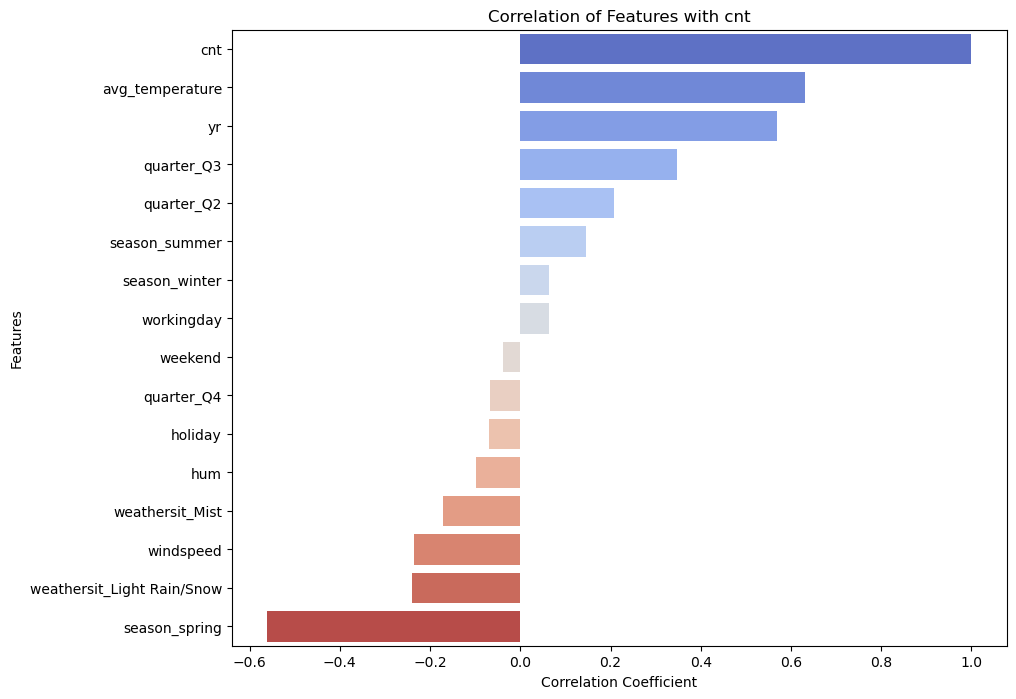

In [59]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the bar plot
sns.barplot(x=correlation_with_cnt.values, y=correlation_with_cnt.index, palette='coolwarm')

# Add title and labels
plt.title('Correlation of Features with cnt')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# Show plot
plt.show()

<font color='blue'>As you might have noticed, `avg_temperature` seems to be correlated to `cnt` the most. Let's see a scatter plot for `avg_temperature` vs `cnt`.</font>

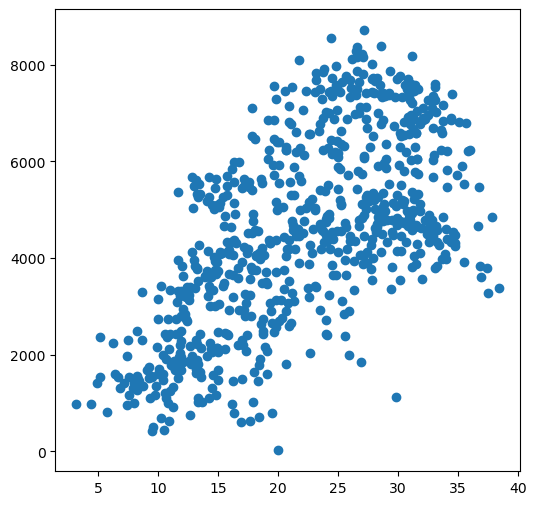

In [61]:
plt.figure(figsize=[6,6])
plt.scatter(bike_rental.avg_temperature, bike_rental.cnt)
plt.show()

<br><font color='red'>**Observations:**</font><font color='blue'> <br>It is clear that as the average temperature goes up, the number of bike rentals also goes up. This means that warmer temperatures tend to lead to more people renting bikes.

<font color='red'>**Renaming certain columns**</font><br>

In [64]:
# Dictionary of new column names for the specified columns
new_column_names = {
    'yr': 'year',
    'hum': 'humidity',
    'cnt': 'count'
}

# Rename the specified columns
bike_rental.rename(columns=new_column_names, inplace=True)

In [65]:
# Display the DataFrame to verify the changes
bike_rental.head()

year  holiday  workingday  humidity  windspeed  count  avg_temperature  \
0     0        0           0   80.5833  10.749882    985        16.146048   
1     0        0           0   69.6087  16.652113    801        16.294774   
2     0        0           1   43.7273  16.636703   1349         8.760587   
3     0        0           1   59.0435  10.739832   1562         9.403050   
4     0        0           1   43.6957  12.522300   1600        10.384369   

   weekend  season_spring  season_summer  season_winter  \
0        1              1              0              0   
1        1              1              0              0   
2        0              1              0              0   
3        0              1              0              0   
4        0              1              0              0   

   weathersit_Light Rain/Snow  weathersit_Mist  quarter_Q2  quarter_Q3  \
0                           0                1           0           0   
1                           0                1           0           0   
2                           0                0           0           0   
3                           0                0           0           0   
4                           0                0           0           0   

   quarter_Q4  
0           0  
1           0  
2           0  
3           0  
4           0

## Step 4: Splitting the Data into Training and Testing Sets

In [67]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_rental, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

<font color='red'>**The Min-Max Scaler**</font><br>
<font color='blue'>The Min-Max Scaler is a normalization technique used to scale continuous features to a specified range, typically between 0 and 1. This scaling process ensures that each feature contributes proportionately to the model, preventing features with larger ranges from dominating those with smaller ranges. <br>
Considering the seasonal patterns and the ordinal relationship between months, MinMax scaling appeared to be the better choice for Month column.</font>

In [70]:
# List of continuous features to be scaled, including 'count'
continuous_features = ['avg_temperature', 'humidity', 'windspeed', 'count']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the continuous features 
df_train[continuous_features] = scaler.fit_transform(df_train[continuous_features])

# Display the first few rows to verify the changes
df_train.head()

year  holiday  workingday  humidity  windspeed     count  \
653     1        0           1  0.575354   0.300794  0.864243   
576     1        0           1  0.725633   0.264686  0.827658   
426     1        0           0  0.640189   0.255342  0.465255   
728     1        0           0  0.498067   0.663106  0.204096   
482     1        0           0  0.504508   0.188475  0.482973   

     avg_temperature  weekend  season_spring  season_summer  season_winter  \
653         0.509110        0              0              0              1   
576         0.795099        0              0              0              0   
426         0.443978        1              1              0              0   
728         0.222805        1              1              0              0   
482         0.396611        1              0              1              0   

     weathersit_Light Rain/Snow  weathersit_Mist  quarter_Q2  quarter_Q3  \
653                           0                0           0           0   
576                           0                0           0           1   
426                           0                1           0           0   
728                           0                0           0           0   
482                           0                1           1           0   

     quarter_Q4  
653           1  
576           0  
426           0  
728           1  
482           0

In [71]:
pd.set_option('display.max_columns', None)
df_train.describe()

year     holiday  workingday    humidity   windspeed       count  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.650369    0.320768    0.513620   
std      0.500429    0.157763    0.468282    0.145882    0.169797    0.224593   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.538643    0.199179    0.356420   
50%      1.000000    0.000000    1.000000    0.653714    0.296763    0.518638   
75%      1.000000    0.000000    1.000000    0.754830    0.414447    0.684710   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       avg_temperature     weekend  season_spring  season_summer  \
count       510.000000  510.000000     510.000000     510.000000   
mean          0.528307    0.298039       0.243137       0.245098   
std           0.219743    0.457846       0.429398       0.430568   
min           0.000000    0.000000       0.000000       0.000000   
25%           0.337859    0.000000       0.000000       0.000000   
50%           0.535588    0.000000       0.000000       0.000000   
75%           0.713024    1.000000       0.000000       0.000000   
max           1.000000    1.000000       1.000000       1.000000   

       season_winter  weathersit_Light Rain/Snow  weathersit_Mist  quarter_Q2  \
count      510.00000                  510.000000       510.000000  510.000000   
mean         0.24902                    0.029412         0.343137    0.237255   
std          0.43287                    0.169124         0.475223    0.425818   
min          0.00000                    0.000000         0.000000    0.000000   
25%          0.00000                    0.000000         0.000000    0.000000   
50%          0.00000                    0.000000         0.000000    0.000000   
75%          0.00000                    0.000000         1.000000    0.000000   
max          1.00000                    1.000000         1.000000    1.000000   

       quarter_Q3  quarter_Q4  
count  510.000000  510.000000  
mean     0.252941    0.256863  
std      0.435124    0.437332  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.000000  
max      1.000000    1.000000

### Dividing into X and Y sets for the model building

In [73]:
y_train = df_train.pop('count')
X_train = df_train

In [74]:
y_train.shape

(510,)

In [75]:
X_train.shape

(510, 15)

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. In `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

### Method 1: Ordinary Least Squares (OLS) regression. 

In [78]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['avg_temperature']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [79]:
# Check the parameters obtained
lr.params

const              0.164397
avg_temperature    0.661022
dtype: float64

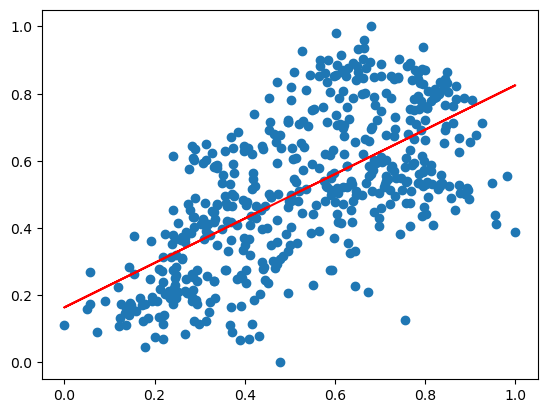

In [80]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.164 + 0.661*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [81]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     365.3
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           9.40e-62
Time:                        18:41:09   Log-Likelihood:                 176.66
No. Observations:                 510   AIC:                            -349.3
Df Residuals:                     508   BIC:                            -340.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1644      0.020     

#### Adding `year`

The R-squared value obtained is `0.418`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `year`. Also, P value is within acceptable range.

In [83]:
# Assign features to variables to X
X_train_lm = X_train[['avg_temperature', 'year']]

In [84]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const              0.074108
avg_temperature    0.603742
year               0.237378
dtype: float64

In [85]:
# Check the summary
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     577.4
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          2.03e-131
Time:                        18:41:10   Log-Likelihood:                 341.22
No. Observations:                 510   AIC:                            -676.4
Df Residuals:                     507   BIC:                            -663.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0741      0.015     

In [86]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                   workingday  62.91
6                      weekend  28.60
7                season_spring   9.32
13                  quarter_Q3   8.80
9                season_winter   7.97
8                season_summer   6.52
14                  quarter_Q4   6.41
12                  quarter_Q2   5.52
5              avg_temperature   3.88
1                      holiday   3.39
3                     humidity   1.90
11             weathersit_Mist   1.57
10  weathersit_Light Rain/Snow   1.25
4                    windspeed   1.20
0                         year   1.03

<font color='red'>**Decision: Retaining Year**</font><font color='blue'> <br>
The positive coefficient of 0.2374 for 'Year' suggests a trend of increasing bike rentals over the years, making it a valuable predictor in the model. R-squared value improved from 0.418 to 0.695. P value is also under acceptable range<br>

#### Adding `quarter_Q3`

In [89]:
# Assign features to variables to X
X_train_lm = X_train[['avg_temperature', 'year', 'quarter_Q3']]

In [90]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

lr_2.params

const              0.065430
avg_temperature    0.630740
year               0.237044
quarter_Q3        -0.021412
dtype: float64

In [91]:
# Check the summary
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     386.0
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          2.35e-130
Time:                        18:41:10   Log-Likelihood:                 342.08
No. Observations:                 510   AIC:                            -676.2
Df Residuals:                     506   BIC:                            -659.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0654      0.016     

#### Dropping the `quarter_Q3` variable and updating the model 

<font color='red'>**Decision: To Drop quarter_Q3**</font><font color='blue'> <br>
The p-value for the mnth_June feature is 0.192, which is far above the common significance level thresholds (0.05). This indicates that the quarter_Q3 feature is not statistically significant and does not have a meaningful impact on the dependent variable, Count.<br>

In [94]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop(columns=['quarter_Q3'])
X.columns

Index(['year', 'holiday', 'workingday', 'humidity', 'windspeed',
       'avg_temperature', 'weekend', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_Light Rain/Snow', 'weathersit_Mist',
       'quarter_Q2', 'quarter_Q4'],
      dtype='object')

#### Adding `quarter_Q2`

In [96]:
# Assign features to variables to X
X_train_lm = X[['avg_temperature', 'year', 'quarter_Q2']]

In [97]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

lr_3.params

const              0.074710
avg_temperature    0.592858
year               0.237454
quarter_Q2         0.021536
dtype: float64

In [98]:
# Check the summary
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     387.0
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          1.51e-130
Time:                        18:41:10   Log-Likelihood:                 342.53
No. Observations:                 510   AIC:                            -677.1
Df Residuals:                     506   BIC:                            -660.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0747      0.015     

In [99]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                   workingday  49.21
6                      weekend  22.30
9                season_winter   6.51
13                  quarter_Q4   5.02
8                season_summer   4.60
7                season_spring   4.43
5              avg_temperature   3.67
12                  quarter_Q2   3.55
1                      holiday   2.84
3                     humidity   1.90
11             weathersit_Mist   1.57
10  weathersit_Light Rain/Snow   1.25
4                    windspeed   1.20
0                         year   1.03

#### Dropping the `quarter_Q2` variable and updating the model 

<font color='red'>**Decision: To Drop quarter_Q2**</font><font color='blue'> <br>
The p-value for the mnth_June feature is 0.108, which is far above the common significance level thresholds (0.05). This indicates that the quarter_Q2 feature is not statistically significant and does not have a meaningful impact on the dependent variable, Count.The R-squared remains the same, indicating that adding quarter_Q2 does not significantly improve the model's explanatory power.<br>

In [102]:
X = X.drop(columns=['quarter_Q2'])
X.columns

Index(['year', 'holiday', 'workingday', 'humidity', 'windspeed',
       'avg_temperature', 'weekend', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_Light Rain/Snow', 'weathersit_Mist',
       'quarter_Q4'],
      dtype='object')

#### Adding `season_summer`

In [104]:
# Assign features to variables to X
X_train_lm = X[['avg_temperature', 'year', 'season_summer']]

In [105]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

lr_4.params

const              0.071239
avg_temperature    0.596987
year               0.237379
season_summer      0.026263
dtype: float64

In [106]:
# Check the summary
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     388.7
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          6.92e-131
Time:                        18:41:10   Log-Likelihood:                 343.31
No. Observations:                 510   AIC:                            -678.6
Df Residuals:                     506   BIC:                            -661.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0712      0.015     

In [107]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                   workingday  48.97
6                      weekend  22.19
9                season_winter   6.51
12                  quarter_Q4   5.01
7                season_spring   4.38
5              avg_temperature   3.46
1                      holiday   2.83
8                season_summer   2.01
3                     humidity   1.88
11             weathersit_Mist   1.57
10  weathersit_Light Rain/Snow   1.25
4                    windspeed   1.20
0                         year   1.03

<font color='red'>**Decision: Retaining season_summer**</font><font color='blue'> <br>
There is a slight improvement in R-squared and Adj. R-squared compared to the previous models, indicating a better fit.The p-value for season_summer is 0.042, which is below the 0.05 threshold, making it statistically significant.<br>

#### Adding `season_winter`

In [110]:
# Assign features to variables to X
X_train_lm = X[['avg_temperature', 'year', 'season_summer','season_winter']]

In [111]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

lr_5.params

const              0.011987
avg_temperature    0.638498
year               0.237286
season_summer      0.061534
season_winter      0.115348
dtype: float64

In [112]:
# Check the summary
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     359.1
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          4.05e-146
Time:                        18:41:10   Log-Likelihood:                 381.89
No. Observations:                 510   AIC:                            -753.8
Df Residuals:                     505   BIC:                            -732.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0120      0.015     

In [113]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                   workingday  48.97
6                      weekend  22.19
9                season_winter   6.51
12                  quarter_Q4   5.01
7                season_spring   4.38
5              avg_temperature   3.46
1                      holiday   2.83
8                season_summer   2.01
3                     humidity   1.88
11             weathersit_Mist   1.57
10  weathersit_Light Rain/Snow   1.25
4                    windspeed   1.20
0                         year   1.03

<font color='red'>**Decision: Retaining season_winter**</font><font color='blue'> <br>
There is a significant improvement in R-squared and Adj. R-squared, indicating a better fit with the addition of season_winter.(from 0.697 to 0.740).Also, the p-value for season_winter is < 0.0001, which is well below the 0.05 threshold, making it highly statistically significant.<br>

#### Adding `workingday`

In [116]:
# Assign features to variables to X
X_train_lm = X[['avg_temperature', 'year', 'season_summer','season_winter','workingday']]

In [117]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

lr_6.params

const              0.000048
avg_temperature    0.636236
year               0.236828
season_summer      0.061026
season_winter      0.116133
workingday         0.019655
dtype: float64

In [118]:
# Check the summary
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     289.2
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          1.62e-145
Time:                        18:41:10   Log-Likelihood:                 383.53
No. Observations:                 510   AIC:                            -755.1
Df Residuals:                     504   BIC:                            -729.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.754e-05      0.017     

In [119]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                   workingday  48.97
6                      weekend  22.19
9                season_winter   6.51
12                  quarter_Q4   5.01
7                season_spring   4.38
5              avg_temperature   3.46
1                      holiday   2.83
8                season_summer   2.01
3                     humidity   1.88
11             weathersit_Mist   1.57
10  weathersit_Light Rain/Snow   1.25
4                    windspeed   1.20
0                         year   1.03

#### Dropping the `workingday` variable and updating the model 

<font color='red'>**Decision: To Drop workingday**</font><font color='blue'> <br>
The p-value for workingday is 0.072, which is above the 0.05 threshold, making it statistically insignificant.Also, the Variance Inflation Factor (VIF) for workingday is 48.97, indicating a high level of multicollinearity.<br>

In [122]:
X = X.drop(columns=['workingday'])
X.columns

Index(['year', 'holiday', 'humidity', 'windspeed', 'avg_temperature',
       'weekend', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_Light Rain/Snow', 'weathersit_Mist', 'quarter_Q4'],
      dtype='object')

#### Adding `weekend`

In [124]:
# Assign features to variables to X
X_train_lm = X[['avg_temperature', 'year', 'season_summer','season_winter','weekend']]

In [125]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

lr_7.params

const              0.016152
avg_temperature    0.637591
year               0.237032
season_summer      0.061436
season_winter      0.115737
weekend           -0.012181
dtype: float64

In [126]:
# Check the summary
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     287.6
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          4.51e-145
Time:                        18:41:10   Log-Likelihood:                 382.49
No. Observations:                 510   AIC:                            -753.0
Df Residuals:                     504   BIC:                            -727.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0162      0.016     

In [127]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                     humidity  27.50
4              avg_temperature  15.02
8                season_winter   7.89
11                  quarter_Q4   6.73
3                    windspeed   4.62
6                season_spring   3.64
10             weathersit_Mist   2.30
7                season_summer   2.21
0                         year   2.07
5                      weekend   1.45
9   weathersit_Light Rain/Snow   1.24
1                      holiday   1.05

#### Dropping the `weekend` variable and updating the model 

<font color='red'>**Decision: To Drop weekend**</font><font color='blue'> <br>
The p-value for weekend is 0.275, which is above the 0.05 threshold, making it statistically insignificant.Also,The R-squared value decreased slightly after adding weekend, indicating that including this variable does not improve the model's explanatory power. <br>

In [130]:
X = X.drop(columns=['weekend'])
X.columns

Index(['year', 'holiday', 'humidity', 'windspeed', 'avg_temperature',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_Light Rain/Snow', 'weathersit_Mist', 'quarter_Q4'],
      dtype='object')

#### Adding `quarter_Q4`

In [132]:
# Assign features to variables to X
X_train_lm = X[['avg_temperature', 'year', 'season_summer','season_winter','quarter_Q4']]

In [133]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

lr_8.params

const              0.022324
avg_temperature    0.626041
year               0.236296
season_summer      0.058922
season_winter      0.166977
quarter_Q4        -0.060227
dtype: float64

In [134]:
# Check the summary
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     290.9
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          5.51e-146
Time:                        18:41:10   Log-Likelihood:                 384.62
No. Observations:                 510   AIC:                            -757.2
Df Residuals:                     504   BIC:                            -731.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0223      0.016     

In [135]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                     humidity  27.40
4              avg_temperature  14.99
7                season_winter   7.89
10                  quarter_Q4   6.72
3                    windspeed   4.59
5                season_spring   3.62
9              weathersit_Mist   2.29
6                season_summer   2.21
0                         year   2.07
8   weathersit_Light Rain/Snow   1.24
1                      holiday   1.04

<font color='red'>**Decision: Retaining quarter_Q4**</font><font color='blue'> <br>
The p-value for quarter_Q4 is 0.020, which is below the 0.05 threshold, making it statistically significant. Also, the R-squared value increased slightly after adding quarter_Q4, indicating that including this variable improves the model's explanatory power.<br>

#### Adding `holiday`

In [138]:
# Assign features to variables to X
X_train_lm = X[['avg_temperature', 'year', 'season_summer','season_winter','quarter_Q4','holiday']]

In [139]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

lr_9.params

const              0.025229
avg_temperature    0.623891
year               0.236177
season_summer      0.057857
season_winter      0.165204
quarter_Q4        -0.057535
holiday           -0.066578
dtype: float64

In [140]:
# Check the summary
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     244.7
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          1.19e-145
Time:                        18:41:10   Log-Likelihood:                 386.78
No. Observations:                 510   AIC:                            -759.6
Df Residuals:                     503   BIC:                            -729.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0252      0.016     

In [141]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                     humidity  27.40
4              avg_temperature  14.99
7                season_winter   7.89
10                  quarter_Q4   6.72
3                    windspeed   4.59
5                season_spring   3.62
9              weathersit_Mist   2.29
6                season_summer   2.21
0                         year   2.07
8   weathersit_Light Rain/Snow   1.24
1                      holiday   1.04

<font color='red'>**Decision: Retaining holiday**</font><font color='blue'> <br>
The p-value for holiday is 0.039, which is below the 0.05 threshold, making it statistically significant. Also, the R-squared value increased slightly after adding holiday, indicating that including this variable improves the model's explanatory power.<br>

#### Adding `humidity`

In [144]:
# Assign features to variables to X
X_train_lm = X[['avg_temperature', 'year', 'season_summer','season_winter','quarter_Q4','holiday','humidity']]

In [145]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

lr_10.params

const              0.170668
avg_temperature    0.662674
year               0.228474
season_summer      0.061028
season_winter      0.180164
quarter_Q4        -0.051616
holiday           -0.072952
humidity          -0.258125
dtype: float64

In [146]:
# Check the summary
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     240.8
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          5.60e-156
Time:                        18:41:10   Log-Likelihood:                 413.86
No. Observations:                 510   AIC:                            -811.7
Df Residuals:                     502   BIC:                            -777.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1707      0.025     

In [147]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                     humidity  27.40
4              avg_temperature  14.99
7                season_winter   7.89
10                  quarter_Q4   6.72
3                    windspeed   4.59
5                season_spring   3.62
9              weathersit_Mist   2.29
6                season_summer   2.21
0                         year   2.07
8   weathersit_Light Rain/Snow   1.24
1                      holiday   1.04

<font color='red'>**Decision: Retaining humidity**</font><font color='blue'> <br>
The p-value for humidity is 0.000, which is below the 0.05 threshold, making it statistically significant. Also, the R-squared value increased from 0.745 to 0.771 after adding humidity, indicating that including this variable improves the model's explanatory power.<br>

#### Adding `weathersit_Mist`

In [150]:
# Assign features to variables to X
X_train_lm = X[['avg_temperature', 'year', 'season_summer','season_winter','quarter_Q4','holiday','humidity','weathersit_Mist']]

In [151]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

lr_11.params

const              0.155339
avg_temperature    0.648956
year               0.229744
season_summer      0.062085
season_winter      0.180168
quarter_Q4        -0.055298
holiday           -0.075188
humidity          -0.208258
weathersit_Mist   -0.028441
dtype: float64

In [152]:
# Check the summary
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     213.4
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          5.18e-156
Time:                        18:41:11   Log-Likelihood:                 416.78
No. Observations:                 510   AIC:                            -815.6
Df Residuals:                     501   BIC:                            -777.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1553      0.025     

In [153]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                     humidity  27.40
4              avg_temperature  14.99
7                season_winter   7.89
10                  quarter_Q4   6.72
3                    windspeed   4.59
5                season_spring   3.62
9              weathersit_Mist   2.29
6                season_summer   2.21
0                         year   2.07
8   weathersit_Light Rain/Snow   1.24
1                      holiday   1.04

<font color='red'>**Decision: Retaining weathersit_Mist**</font><font color='blue'> <br>
The p-value for weathersit_Mist is 0.017, which is below the 0.05 threshold, making it statistically significant. Also, the R-squared value increased slightly after addingweathersit_Mist, indicating that including this variable improves the model's explanatory power.<br>

#### Adding `windspeed`

In [156]:
# Assign features to variables to X
X_train_lm = X[['avg_temperature', 'year', 'season_summer','season_winter','quarter_Q4','holiday','humidity','weathersit_Mist','windspeed']]

In [157]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

lr_12.params

const              0.283777
avg_temperature    0.620511
year               0.229387
season_summer      0.072222
season_winter      0.168144
quarter_Q4        -0.046341
holiday           -0.073287
humidity          -0.278438
weathersit_Mist   -0.021837
windspeed         -0.223496
dtype: float64

In [158]:
# Check the summary
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     219.7
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          1.78e-167
Time:                        18:41:11   Log-Likelihood:                 446.58
No. Observations:                 510   AIC:                            -873.2
Df Residuals:                     500   BIC:                            -830.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2838      0.029     

In [159]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                     humidity  27.40
4              avg_temperature  14.99
7                season_winter   7.89
10                  quarter_Q4   6.72
3                    windspeed   4.59
5                season_spring   3.62
9              weathersit_Mist   2.29
6                season_summer   2.21
0                         year   2.07
8   weathersit_Light Rain/Snow   1.24
1                      holiday   1.04

#### Dropping the `weathersit_Mist` variable and updating the model 

<font color='red'>**Decision: To Drop weathersit_Mist**</font><font color='blue'> <br>
 The p-value is 0.052, which is slightly above the 0.05 threshold.Given the p-value of weathersit_Mist is just above the 0.05 threshold, it is marginally non-significant. Given the model's already high R-squared value and the minor impact of the variable, it is reasonable to drop weathersit_Mist to simplify the model. <br>

In [162]:
X = X.drop(columns=['weathersit_Mist'])
X.columns

Index(['year', 'holiday', 'humidity', 'windspeed', 'avg_temperature',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_Light Rain/Snow', 'quarter_Q4'],
      dtype='object')

In [163]:
# Assign features to variables to X
X_train_lm = X[['avg_temperature', 'year', 'season_summer','season_winter','quarter_Q4','holiday','humidity','windspeed']]

In [164]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_13 = sm.OLS(y_train, X_train_lm).fit()

lr_13.params

const              0.297856
avg_temperature    0.630458
year               0.228410
season_summer      0.071603
season_winter      0.167919
quarter_Q4        -0.043364
holiday           -0.071545
humidity          -0.317811
windspeed         -0.227630
dtype: float64

In [165]:
# Check the summary
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     245.3
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          7.24e-168
Time:                        18:41:11   Log-Likelihood:                 444.66
No. Observations:                 510   AIC:                            -871.3
Df Residuals:                     501   BIC:                            -833.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2979      0.028     

In [166]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                    humidity  18.21
4             avg_temperature  12.23
7               season_winter   7.81
9                  quarter_Q4   6.68
3                   windspeed   4.57
5               season_spring   3.36
6               season_summer   2.16
0                        year   2.07
8  weathersit_Light Rain/Snow   1.13
1                     holiday   1.04

#### Dropping the `quarter_Q4` variable and updating the model 

<font color='red'>**Decision: To Drop quarter_Q4**</font><font color='blue'> <br>
After dropping weathersit_Mist, the p-value for quarter_Q4 increased to 0.061, which is above the 0.05 threshold. Therefore, it is reasonable to consider dropping quarter_Q4 to further refine the model. <br>

In [169]:
X = X.drop(columns=['quarter_Q4'])
X.columns

Index(['year', 'holiday', 'humidity', 'windspeed', 'avg_temperature',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_Light Rain/Snow'],
      dtype='object')

In [170]:
# Assign features to variables to X
X_train_lm = X[['avg_temperature', 'year', 'season_summer','season_winter','holiday','humidity','windspeed']]

In [171]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_14 = sm.OLS(y_train, X_train_lm).fit()

lr_14.params

const              0.293005
avg_temperature    0.639247
year               0.229055
season_summer      0.073564
season_winter      0.130865
holiday           -0.074311
humidity          -0.320393
windspeed         -0.230004
dtype: float64

In [172]:
# Check the summary
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     278.5
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          2.41e-168
Time:                        18:41:11   Log-Likelihood:                 442.87
No. Observations:                 510   AIC:                            -869.7
Df Residuals:                     502   BIC:                            -835.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2930      0.028     

In [173]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                    humidity  18.06
4             avg_temperature  12.09
3                   windspeed   4.55
5               season_spring   3.34
7               season_winter   2.75
6               season_summer   2.16
0                        year   2.07
8  weathersit_Light Rain/Snow   1.13
1                     holiday   1.04

#### Adding `weathersit_Light Rain/Snow`

In [175]:
# Assign features to variables to X
X_train_lm = X[['avg_temperature', 'year', 'season_summer','season_winter','holiday','humidity','windspeed','weathersit_Light Rain/Snow']]

In [176]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_15 = sm.OLS(y_train, X_train_lm).fit()

lr_15.params

const                         0.252137
avg_temperature               0.634530
year                          0.227022
season_summer                 0.070885
season_winter                 0.135510
holiday                      -0.080593
humidity                     -0.259415
windspeed                    -0.199050
weathersit_Light Rain/Snow   -0.188196
dtype: float64

In [177]:
# Check the summary
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     272.9
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          3.54e-177
Time:                        18:41:11   Log-Likelihood:                 466.54
No. Observations:                 510   AIC:                            -915.1
Df Residuals:                     501   BIC:                            -877.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [178]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                    humidity  18.06
4             avg_temperature  12.09
3                   windspeed   4.55
5               season_spring   3.34
7               season_winter   2.75
6               season_summer   2.16
0                        year   2.07
8  weathersit_Light Rain/Snow   1.13
1                     holiday   1.04

<font color='red'>**Decision: Retaining weathersit_Light Rain/Snow**</font><font color='blue'> <br>
The p-value for weathersit_Light Rain/Snow is 0.000, which is below the 0.05 threshold, making it statistically significant. Also, the R-squared value increased from 0.795 to 0.813 after adding weathersit_Light Rain/Snow, indicating that including this variable improves the model's explanatory power.<br>

#### Adding `season_spring`

In [181]:
# Assign features to variables to X
X_train_lm = X[['avg_temperature', 'year', 'season_summer','season_winter','holiday','humidity','windspeed','weathersit_Light Rain/Snow','season_spring']]

In [182]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_16 = sm.OLS(y_train, X_train_lm).fit()

lr_16.params

const                         0.333935
avg_temperature               0.534377
year                          0.228943
season_summer                 0.038157
season_winter                 0.089646
holiday                      -0.078723
humidity                     -0.251687
windspeed                    -0.190599
weathersit_Light Rain/Snow   -0.194159
season_spring                -0.074149
dtype: float64

In [183]:
# Check the summary
print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     249.7
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          1.16e-178
Time:                        18:41:11   Log-Likelihood:                 472.94
No. Observations:                 510   AIC:                            -925.9
Df Residuals:                     500   BIC:                            -883.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [184]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                    humidity  18.06
4             avg_temperature  12.09
3                   windspeed   4.55
5               season_spring   3.34
7               season_winter   2.75
6               season_summer   2.16
0                        year   2.07
8  weathersit_Light Rain/Snow   1.13
1                     holiday   1.04

<font color='red'>**Decision: Retaining season_spring**</font><font color='blue'> <br>
The p-value for season_spring is 0.000, which is below the 0.05 threshold, making it statistically significant. Also, the R-squared value slightly increased after adding season_spring, indicating that including this variable improves the model's explanatory power.<br>

#### Dropping the `humidity` variable and updating the model 

<font color='red'>**Decision: To Drop humidity**</font><font color='blue'> <br>
Due to its high Variance Inflation Factor (VIF) of 18.06, indicating multicollinearity with other variables, humidity will be dropped from the model. <br>

In [188]:
X = X.drop(columns=['humidity'])
X.columns

Index(['year', 'holiday', 'windspeed', 'avg_temperature', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_Light Rain/Snow'],
      dtype='object')

In [189]:
# Assign features to variables to X
X_train_lm = X[['avg_temperature', 'year', 'season_summer','season_winter','holiday','windspeed','weathersit_Light Rain/Snow','season_spring']]

In [190]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_17 = sm.OLS(y_train, X_train_lm).fit()

lr_17.params

const                         0.183295
avg_temperature               0.493035
year                          0.235364
season_summer                 0.028214
season_winter                 0.068238
holiday                      -0.075487
windspeed                    -0.136318
weathersit_Light Rain/Snow   -0.249100
season_spring                -0.084757
dtype: float64

In [191]:
# Check the summary
print(lr_17.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     245.0
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          9.13e-168
Time:                        18:41:11   Log-Likelihood:                 444.42
No. Observations:                 510   AIC:                            -870.8
Df Residuals:                     501   BIC:                            -832.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [192]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                   windspeed  4.53
3             avg_temperature  3.42
0                        year  2.06
4               season_spring  1.87
5               season_summer  1.75
6               season_winter  1.55
7  weathersit_Light Rain/Snow  1.06
1                     holiday  1.04

#### Dropping the `season_summer` variable and updating the model 

<font color='red'>**Decision: To Drop season_summer**</font><font color='blue'> <br>
After removing humidity and updating the model,The adjusted R-squared decreased slightly from 0.793 to 0.793, indicating a minimal loss in explanatory power after dropping humidity.The p-value of season_summer increased to 0.057, which is above the conventional threshold of significance (e.g., 0.05).<br>

In [195]:
X = X.drop(columns=['season_summer'])
X.columns

Index(['year', 'holiday', 'windspeed', 'avg_temperature', 'season_spring',
       'season_winter', 'weathersit_Light Rain/Snow'],
      dtype='object')

In [196]:
# Assign features to variables to X
X_train_lm = X[['avg_temperature', 'year','season_winter','holiday','windspeed','weathersit_Light Rain/Snow','season_spring']]

In [197]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_18 = sm.OLS(y_train, X_train_lm).fit()

lr_18.params

const                         0.217713
avg_temperature               0.459178
year                          0.235955
season_winter                 0.046770
holiday                      -0.076825
windspeed                    -0.129597
weathersit_Light Rain/Snow   -0.251437
season_spring                -0.111997
dtype: float64

In [198]:
# Check the summary
print(lr_18.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     278.0
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          3.22e-168
Time:                        18:41:11   Log-Likelihood:                 442.57
No. Observations:                 510   AIC:                            -869.1
Df Residuals:                     502   BIC:                            -835.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [199]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                   windspeed  3.84
3             avg_temperature  3.35
0                        year  2.05
4               season_spring  1.60
5               season_winter  1.33
6  weathersit_Light Rain/Snow  1.06
1                     holiday  1.04

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [201]:
y_train_pred = lr_18.predict(X_train_lm)

#### **Assumption 1: Linearity of the Relationship**
We check if the relationship between each predictor and the target variable (count) is linear.

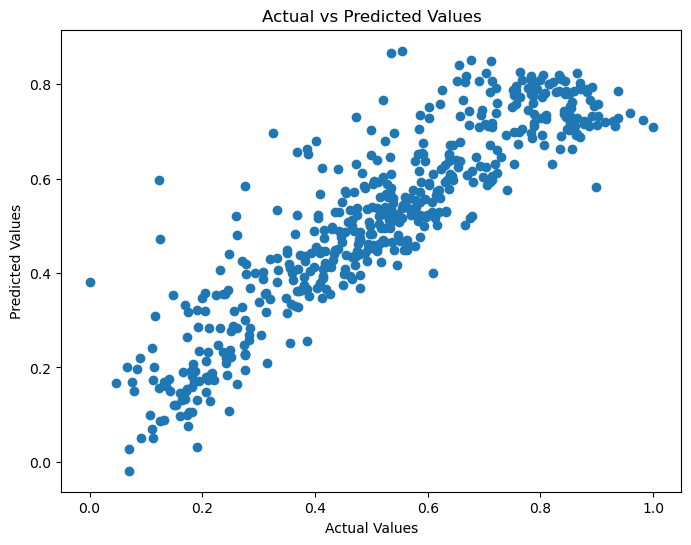

In [203]:
# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

<font color='red'>**Observation: Linearity of the Relationship**</font><font color='blue'> <br>The relationship between each predictorand the target variable (count of bike rentals) appears to be linear. This conclusion is supported by the scatter plots showing a consistent pattern where the predictions align closely with the actual values.

####  **Assumption 2: Checking Normality of Residuals** 
The residuals should follow a normal distribution (bell curve shape). This assumption helps in interpreting statistical tests and confidence intervals correctly.

Text(0.5, 0, 'Errors')

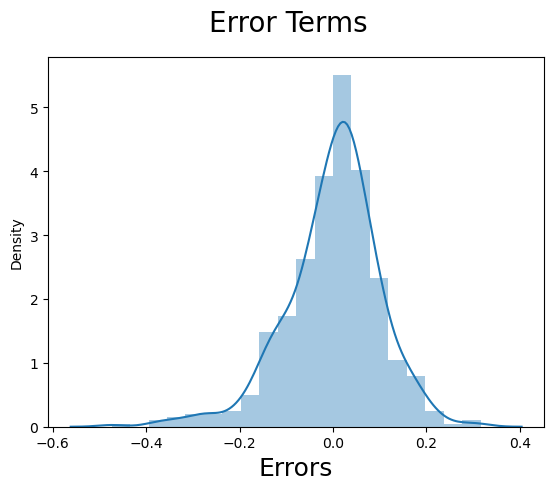

In [206]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [207]:
residuals = y_train - y_train_pred

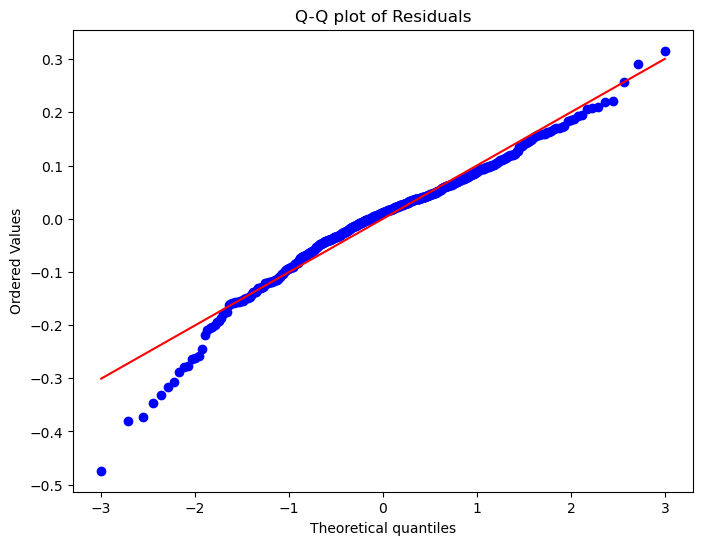

In [208]:
# Q-Q plot of residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q plot of Residuals')
plt.show()

<font color='red'>**Observation: Normality of Residuals**</font><font color='blue'> <br>The histogram and Q-Q plot of residuals suggest that they approximately follow a normal distribution. This indicates that the assumption of normality for residuals is reasonably satisfied, implying symmetric distribution of errors around zero.

####  **Assumption 3: Homoscedasticity :** 
This assumption means that the variance (how spread out the data points are) of the errors (residuals) should be constant across all values of the predictors.

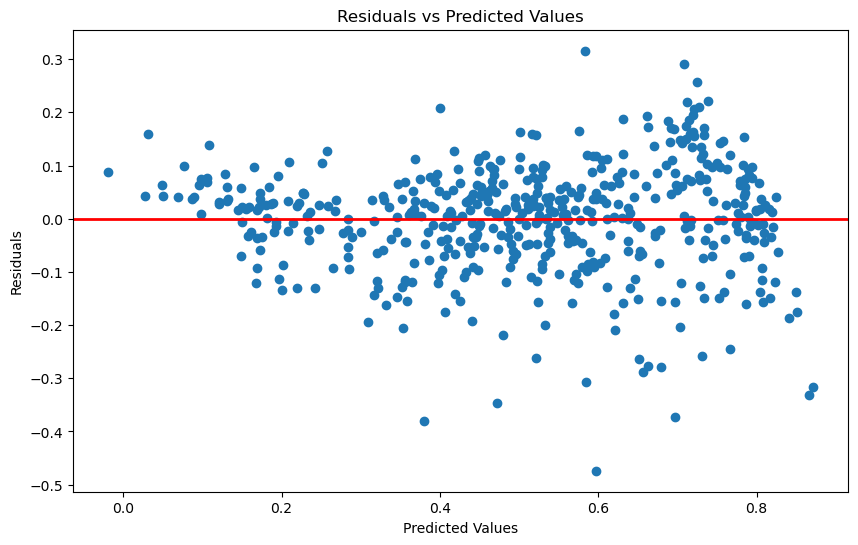

In [211]:
# Residuals versus Predicted values (for homoscedasticity)
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

<font color='red'>**Observation: Homoscedasticity**</font><font color='blue'> <br>The scatter plot of residuals against predicted values does not display any specific pattern or trend. There is no visible cone-shaped or fan-shaped distribution, suggesting that the assumption of homoscedasticity is likely met. Residuals appear to have constant variance across different levels of predicted values.

####  **Assumption 4: Independence of Residuals** 
We check if the residuals are independent of each other (no autocorrelation).

In [214]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson test for autocorrelation in residuals.
#In essence, the Durbin-Watson test helps ensure that the residuals in a regression model are independent, 
#which is essential for reliable and valid statistical inference and predictions.
# Values close to 2 indicate no significant autocorrelation

durbin_watson_stat = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {durbin_watson_stat}')

Durbin-Watson statistic: 1.941433701457399


<font color='red'>**Observation: Independence of Residuals**</font><font color='blue'> <br>The Durbin-Watson statistic of approximately 1.9414 indicates that there is no significant autocorrelation in residuals. This value is close to the ideal range of 2, suggesting that residuals are independent of each other, meeting the assumption of independence.

####  **Assumption 5: Multicollinearity** 
We check for multicollinearity among predictors using Variance Inflation Factor (VIF).

In [217]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                   windspeed  3.84
3             avg_temperature  3.35
0                        year  2.05
4               season_spring  1.60
5               season_winter  1.33
6  weathersit_Light Rain/Snow  1.06
1                     holiday  1.04

<font color='red'>**Observation: Multicollinearity**</font><font color='blue'> <br>The Variance Inflation Factor (VIF) values for all predictors are below commonly accepted thresholds (typically VIF < 10 or VIF < 5), indicating that multicollinearity is not a significant issue. This suggests that the predictors are sufficiently independent of each other.

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fifteenth model.

#### Dividing into X_test and y_test

In [221]:
continuous_features = ['avg_temperature', 'humidity', 'windspeed', 'count']

# Fit and transform the continuous features 
df_test[continuous_features] = scaler.transform(df_test[continuous_features])

In [222]:
#Dividing into X_test and y_test
y_test = df_test.pop('count')
X_test = df_test

In [223]:
X_test.columns

Index(['year', 'holiday', 'workingday', 'humidity', 'windspeed',
       'avg_temperature', 'weekend', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_Light Rain/Snow', 'weathersit_Mist',
       'quarter_Q2', 'quarter_Q3', 'quarter_Q4'],
      dtype='object')

In [224]:
X_train_lm.columns

Index(['const', 'avg_temperature', 'year', 'season_winter', 'holiday',
       'windspeed', 'weathersit_Light Rain/Snow', 'season_spring'],
      dtype='object')

In [225]:
# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test)

In [226]:
# # Creating X_test_new dataframe by dropping variables from X_test_new
X_test_new = X_test_new[X_train_lm.columns]
X_test_new

const  avg_temperature  year  season_winter  holiday  windspeed  \
184    1.0         0.804648     0              0        1   0.084219   
535    1.0         0.876574     1              0        0   0.153728   
299    1.0         0.507384     0              1        0   0.334206   
221    1.0         0.841814     0              0        0   0.339570   
152    1.0         0.782617     0              0        0   0.537414   
..     ...              ...   ...            ...      ...        ...   
400    1.0         0.251919     1              0        0   0.287411   
702    1.0         0.519301     1              1        0   0.283397   
127    1.0         0.585256     0              0        0   0.069510   
640    1.0         0.717350     1              1        0   0.052115   
72     1.0         0.334372     0              0        0   0.203418   

     weathersit_Light Rain/Snow  season_spring  
184                           0              0  
535                           0              0  
299                           0              0  
221                           0              0  
152                           0              0  
..                          ...            ...  
400                           0              1  
702                           0              0  
127                           0              0  
640                           0              0  
72                            0              1  

[219 rows x 8 columns]

In [227]:
# Making predictions using the eighteenth model
y_pred = lr_18.predict(X_test_new)

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

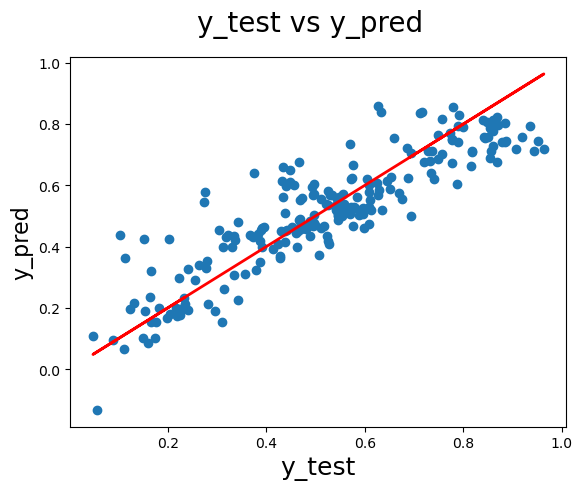

In [229]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red', linewidth=2)  # Plotting the line y = x
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

We can see that the equation of our best fitted line is:

$ Count =  0.0.2177 + (0.4592 × avg_temperature)+(0.4592 × year)+(0.0468 × season_winter)+(-0.0768 × holiday)+(-0.1296 × windspeed)+(-0.2514 × weathersit_Light Rain/Snow)+(-0.1120 × season_spring) $

In [231]:
r2_score(y_test, y_pred)

0.7848356119774401

## Method 2: Recursive Feature Elimination (RFE)

In [234]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [235]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('avg_temperature', True, 1),
 ('weekend', True, 1),
 ('season_spring', False, 4),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_Light Rain/Snow', True, 1),
 ('weathersit_Mist', False, 3),
 ('quarter_Q2', False, 6),
 ('quarter_Q3', False, 2),
 ('quarter_Q4', False, 5)]

In [236]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'humidity', 'windspeed',
       'avg_temperature', 'weekend', 'season_summer', 'season_winter',
       'weathersit_Light Rain/Snow'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [238]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe

year  holiday  workingday  humidity  windspeed  avg_temperature  weekend  \
653     1        0           1  0.575354   0.300794         0.509110        0   
576     1        0           1  0.725633   0.264686         0.795099        0   
426     1        0           0  0.640189   0.255342         0.443978        1   
728     1        0           0  0.498067   0.663106         0.222805        1   
482     1        0           0  0.504508   0.188475         0.396611        1   
..    ...      ...         ...       ...        ...              ...      ...   
526     1        0           1  0.605840   0.355596         0.797210        0   
578     1        0           1  0.679690   0.187140         0.849258        0   
53      0        0           1  0.435939   0.111379         0.212911        0   
350     0        0           0  0.577930   0.431816         0.236802        1   
79      0        0           1  0.759870   0.529881         0.450779        0   

     season_summer  season_winter  weathersit_Light Rain/Snow  
653              0              1                           0  
576              0              0                           0  
426              0              0                           0  
728              0              0                           0  
482              1              0                           0  
..             ...            ...                         ...  
526              1              0                           0  
578              0              0                           0  
53               0              0                           0  
350              0              1                           0  
79               1              0                           0  

[510 rows x 10 columns]

In [239]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [240]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [241]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     243.8
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          1.43e-176
Time:                        18:41:12   Log-Likelihood:                 468.02
No. Observations:                 510   AIC:                            -916.0
Df Residuals:                     500   BIC:                            -873.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### Dropping the variable `holiday` and updating the model

`holiday` is insignificant in presence of other variables, can be dropped

In [244]:
X_train_new1 = X_train_rfe.drop(["holiday"], axis = 1)
X_train_new1.columns

Index(['const', 'year', 'workingday', 'humidity', 'windspeed',
       'avg_temperature', 'weekend', 'season_summer', 'season_winter',
       'weathersit_Light Rain/Snow'],
      dtype='object')

In [245]:
X_train_lm = sm.add_constant(X_train_new1)

In [246]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [247]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     243.8
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          1.43e-176
Time:                        18:41:13   Log-Likelihood:                 468.02
No. Observations:                 510   AIC:                            -916.0
Df Residuals:                     500   BIC:                            -873.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [248]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                       const  76.22
2                  workingday   9.01
6                     weekend   8.97
3                    humidity   1.24
8               season_winter   1.23
5             avg_temperature   1.17
4                   windspeed   1.16
7               season_summer   1.15
9  weathersit_Light Rain/Snow   1.11
1                        year   1.03

In [249]:
X_train_new1 = X_train_new1.drop(['const'], axis=1)

In [250]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                    humidity  17.86
1                  workingday  14.79
4             avg_temperature   7.58
5                     weekend   6.99
3                   windspeed   4.32
0                        year   2.05
7               season_winter   1.63
6               season_summer   1.52
8  weathersit_Light Rain/Snow   1.10

### Dropping the variable `humidity` and updating the model

In [252]:
X_train_new1 = X_train_new1.drop(["humidity"], axis = 1)
X_train_new1.columns

Index(['year', 'workingday', 'windspeed', 'avg_temperature', 'weekend',
       'season_summer', 'season_winter', 'weathersit_Light Rain/Snow'],
      dtype='object')

In [253]:
X_train_lm = sm.add_constant(X_train_new1)

In [254]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [255]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     237.5
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          4.55e-165
Time:                        18:41:13   Log-Likelihood:                 438.08
No. Observations:                 510   AIC:                            -858.2
Df Residuals:                     501   BIC:                            -820.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [256]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                  workingday  8.47
3             avg_temperature  6.65
2                   windspeed  4.32
4                     weekend  4.26
0                        year  2.05
5               season_summer  1.51
6               season_winter  1.50
7  weathersit_Light Rain/Snow  1.06

### Dropping the variable `workingday` and updating the model

In [258]:
X_train_new1 = X_train_new1.drop(["workingday"], axis = 1)
X_train_new1.columns

Index(['year', 'windspeed', 'avg_temperature', 'weekend', 'season_summer',
       'season_winter', 'weathersit_Light Rain/Snow'],
      dtype='object')

In [259]:
X_train_lm = sm.add_constant(X_train_new1)

In [260]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [261]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     266.6
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          1.32e-164
Time:                        18:41:13   Log-Likelihood:                 434.10
No. Observations:                 510   AIC:                            -852.2
Df Residuals:                     502   BIC:                            -818.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [262]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2             avg_temperature  3.34
1                   windspeed  3.01
0                        year  2.00
4               season_summer  1.49
3                     weekend  1.39
5               season_winter  1.36
6  weathersit_Light Rain/Snow  1.06

### Dropping the variable `weekend` and updating the model

In [264]:
X_train_new1 = X_train_new1.drop(["weekend"], axis = 1)
X_train_new1.columns

Index(['year', 'windspeed', 'avg_temperature', 'season_summer',
       'season_winter', 'weathersit_Light Rain/Snow'],
      dtype='object')

In [265]:
X_train_lm = sm.add_constant(X_train_new1)

In [266]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [267]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     310.6
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          1.45e-165
Time:                        18:41:13   Log-Likelihood:                 433.38
No. Observations:                 510   AIC:                            -852.8
Df Residuals:                     503   BIC:                            -823.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [268]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2             avg_temperature  3.26
1                   windspeed  2.91
0                        year  2.00
3               season_summer  1.49
4               season_winter  1.35
5  weathersit_Light Rain/Snow  1.06

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [270]:
y_train_pred = lm.predict(X_train_lm)

#### **Assumption 1: Linearity of the Relationship**
We check if the relationship between each predictor and the target variable (count) is linear.

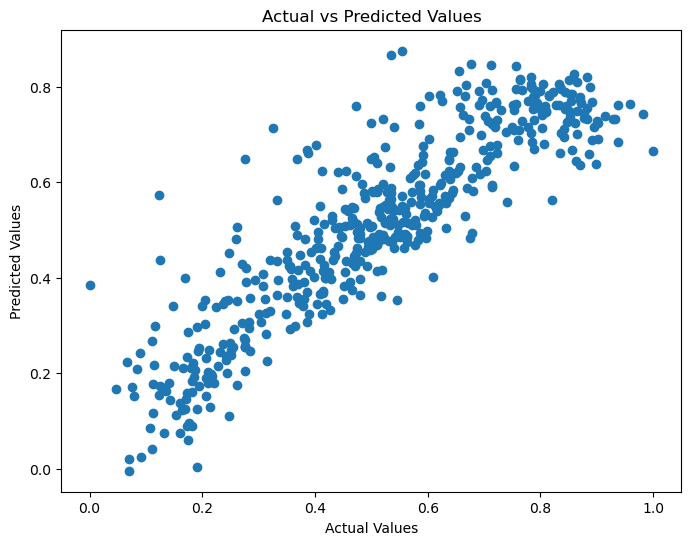

In [272]:
# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

<font color='red'>**Observation: Linearity of the Relationship**</font>
<font color='blue'> <br>The relationship between each predictorand the target variable (count of bike rentals) appears to be linear. This conclusion is supported by the scatter plots showing a consistent pattern where the predictions align closely with the actual values.

####  **Assumption 2: Checking Normality of Residuals** 
The residuals should follow a normal distribution (bell curve shape). This assumption helps in interpreting statistical tests and confidence intervals correctly.

Text(0.5, 0, 'Errors')

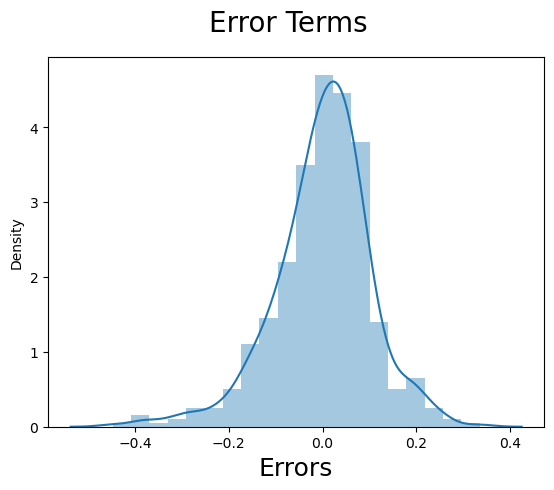

In [275]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [276]:
residuals = y_train - y_train_pred

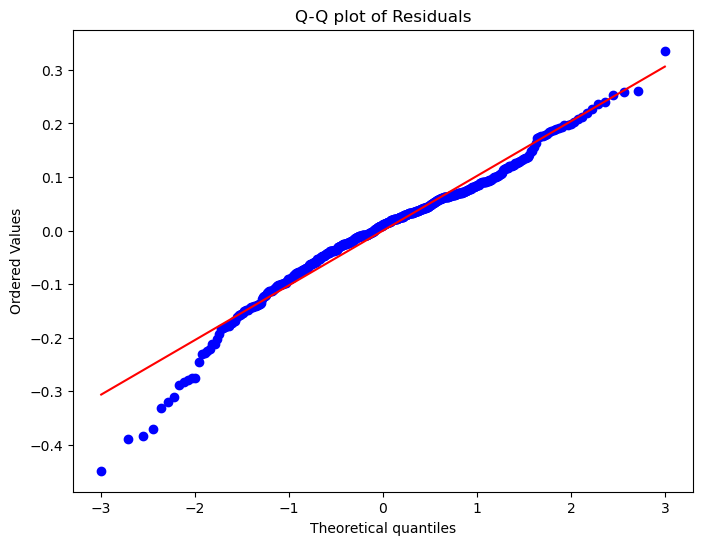

In [277]:
# Q-Q plot of residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q plot of Residuals')
plt.show()

<font color='red'>**Observation: Normality of Residuals**</font><font color='blue'> <br>The histogram and Q-Q plot of residuals suggest that they approximately follow a normal distribution. This indicates that the assumption of normality for residuals is reasonably satisfied, implying symmetric distribution of errors around zero.

####  **Assumption 3: Homoscedasticity :** 
This assumption means that the variance (how spread out the data points are) of the errors (residuals) should be constant across all values of the predictors.

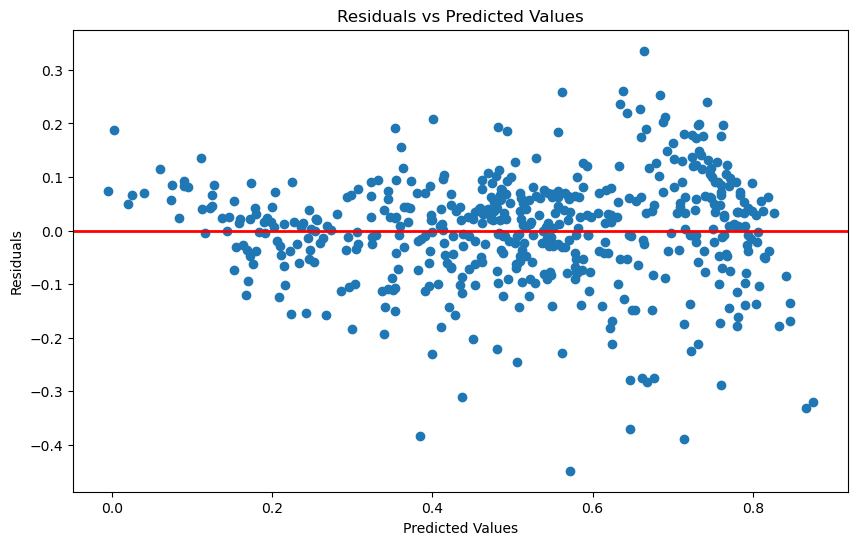

In [280]:
# Residuals versus Predicted values (for homoscedasticity)
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


<font color='red'>**Observation: Homoscedasticity**</font><font color='blue'> <br>The scatter plot of residuals against predicted values does not display any specific pattern or trend. There is no visible cone-shaped or fan-shaped distribution, suggesting that the assumption of homoscedasticity is likely met. Residuals appear to have constant variance across different levels of predicted values.

####  **Assumption 4: Independence of Residuals** 
We check if the residuals are independent of each other (no autocorrelation).

In [283]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson test for autocorrelation in residuals.
#In essence, the Durbin-Watson test helps ensure that the residuals in a regression model are independent, 
#which is essential for reliable and valid statistical inference and predictions.
# Values close to 2 indicate no significant autocorrelation

durbin_watson_stat = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {durbin_watson_stat}')

Durbin-Watson statistic: 1.9251517792714483


<font color='red'>**Observation: Independence of Residuals**</font><font color='blue'> <br>The Durbin-Watson statistic of approximately 1.9251 indicates that there is no significant autocorrelation in residuals. This value is close to the ideal range of 2, suggesting that residuals are independent of each other, meeting the assumption of independence.

####  **Assumption 5: Multicollinearity** 
We check for multicollinearity among predictors using Variance Inflation Factor (VIF).

In [286]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2             avg_temperature  3.26
1                   windspeed  2.91
0                        year  2.00
3               season_summer  1.49
4               season_winter  1.35
5  weathersit_Light Rain/Snow  1.06

<font color='red'>**Observation: Multicollinearity**</font><font color='blue'> <br>The Variance Inflation Factor (VIF) values for all predictors are below commonly accepted thresholds (typically VIF < 10 or VIF < 5), indicating that multicollinearity is not a significant issue. This suggests that the predictors are sufficiently independent of each other.

## Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final

In [289]:
# Now let's use our model to make predictions.

# Creating X_test_new1 dataframe by dropping variables from X_test
X_test_new1 = X_test[X_train_new1.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new1)

In [290]:
# Making predictions
y_pred = lm.predict(X_test_new1)

## Model Evaluation

Text(0, 0.5, 'y_pred')

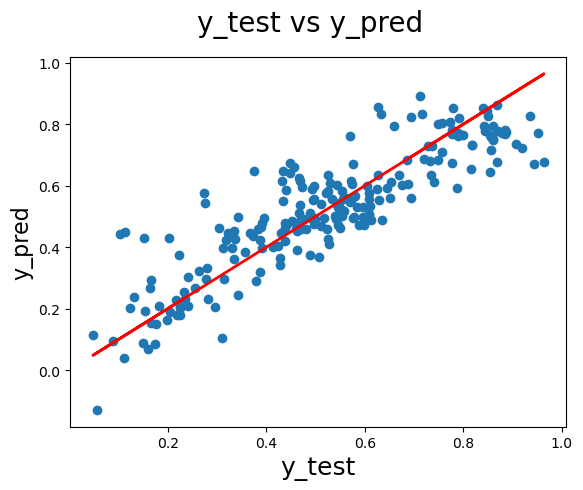

In [292]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.plot(y_test, y_test, color='red', linewidth=2)  # Plotting the line y = x
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [293]:
r2_score(y_test, y_pred)

0.7613796255994091

<br><font color='red'>**Final Decision : Manual Approach Model Selection**</font><font color='blue'> <br>
Higher R-squared Value: The manual approach resulted in a slightly higher R-squared value (0.7848) compared to the automatic approach (0.7614). This indicates that the manual selection of features might better explain the variance in the target variable (count).<br>
While both approaches ensured that multicollinearity was managed (all VIFs below 5), the manual approach allowed for a more deliberate selection of features that balanced explanatory power and multicollinearity concerns.<br>
In essence, the manual approach was chosen because it yielded a slightly higher R-squared value and allowed for a more tailored selection of features that could potentially provide a more accurate and interpretable model for predicting bike sharing demand.